In [1]:
from Models_Util import *

## Reading input

In [2]:
math_problems = pd.read_csv("../Data/GT_GPT.csv", index_col=0)
math_problems.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_mod,has_logarithm,has_fraction,has_eq,...,number_of_numbers,has_digits,has_symbol,symbol_count,has_exp,no_of_exps,has_pow,no_of_pow,gpt_val_5,gpt_val_3
0,Kevin Kangaroo begins hopping on a number line...,Level 5,3,Kevin Kangaroo begins hopping on a number line...,2,1,False,False,True,False,...,2,True,False,0,False,0,False,0,2,2
1,The ratio of the areas of two squares is $\fra...,Level 4,3,The ratio of the areas of two squares is . Aft...,3,5,False,False,True,False,...,0,False,True,2,False,0,True,1,3,2
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,3,"If , then find .",1,2,False,False,False,False,...,4,True,True,2,False,0,True,3,4,2
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,3,Let and . What is ?,3,3,False,False,False,False,...,1,True,False,0,False,0,True,1,3,2
4,James has a total of 66 dollars in his piggy b...,Level 2,3,James has a total of 66 dollars in his piggy b...,0,0,False,False,False,False,...,0,False,False,0,False,0,False,0,2,2


In [3]:
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
math_problems['type'] = math_problems['type'].replace(size_mapping)

In [4]:
# Initialising the metrics dataframe
scores = pd.DataFrame(columns=['Model','F1_train','F1_test'])

## Experiment 1: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features (eg: has_exp, has_log)
3. no_of_equations
4. no_of_variables

Run Random forest for the default 5 level classification and report the results

In [5]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})


Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5898516553688967
train_evaluation:

              precision    recall  f1-score   support

           1       0.85      0.75      0.80       718
           2       0.63      0.80      0.70       492
           3       0.85      0.79      0.82       677

    accuracy                           0.78      1887
   macro avg       0.78      0.78      0.77      1887
weighted avg       0.79      0.78      0.78      1887

[[537 132  49]
 [ 51 395  46]
 [ 41 102 534]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.71      0.55      0.62       133
           2       0.39      0.56      0.46       111
           3       0.52      0.43      0.47       104

    accuracy                           0.52       348
   macro avg       0.54      0.51      0.52       348
weighted avg       0.55      0.52 

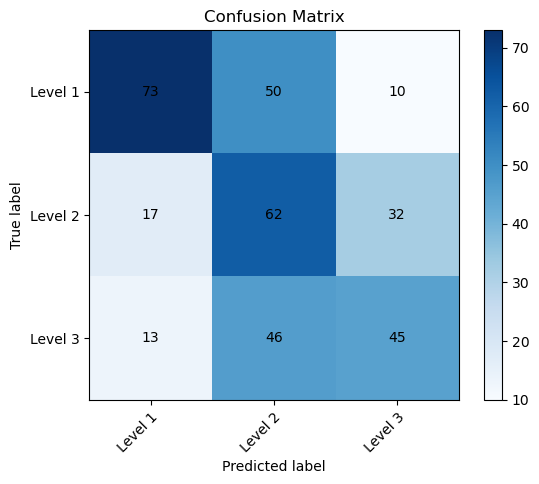

Feature Importance Rankings:
1. no_of_variables: 15.73418854324661
2. large_words_cat: 13.47970087793021
3. word_count_cat: 12.194307406593367
4. no_of_equations: 12.097958443044952
5. words_per_sentence_cat: 11.686046185601615
6. average_word_length_cat: 8.184622088469297
7. has_symbol: 5.285895523263411
8. sentence_count_cat: 4.853532396848341
9. has_pow: 4.3724612172321855
10. has_digits: 3.0792285538935764
11. has_fraction: 3.0633776750547477
12. has_eq: 2.912011928691536
13. has_neq: 1.220154603008774
14. has_logarithm: 1.2030481156282657
15. has_mod: 0.633466441493113
16. has_exp: 0.0
17. type: 0.0


In [6]:
scores = rf_model(data1, scores=scores, experiment="Experiment1+SMOTE", club_target=True)

In [7]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195


5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5122016466249384
train_evaluation:

              precision    recall  f1-score   support

           1       0.84      0.69      0.76       502
           2       0.69      0.84      0.76       512
           3       0.82      0.77      0.80       374

    accuracy                           0.77      1388
   macro avg       0.78      0.77      0.77      1388
weighted avg       0.78      0.77      0.77      1388

[[345 128  29]
 [ 48 432  32]
 [ 18  69 287]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.74      0.55      0.63       137
           2       0.42      0.55      0.48       121
           3       0.47      0.46      0.46        90

    accuracy                  

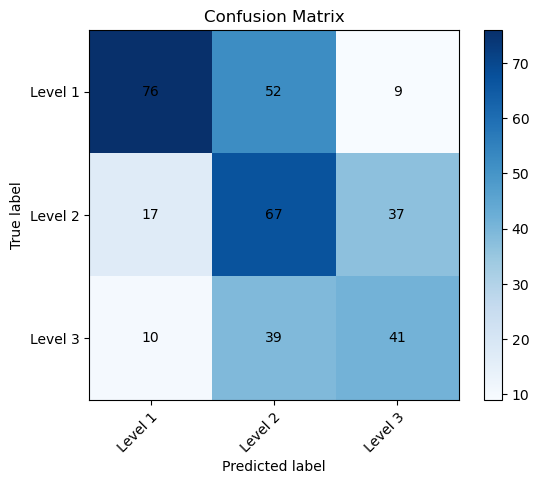

Feature Importance Rankings:
1. no_of_variables: 14.120272282396854
2. large_words_cat: 13.918320366332013
3. no_of_equations: 12.214513487771448
4. word_count_cat: 11.597145499473324
5. words_per_sentence_cat: 10.889663892863066
6. average_word_length_cat: 6.992327135705473
7. has_symbol: 6.135906449878121
8. has_pow: 5.365990006833789
9. sentence_count_cat: 5.185382517598627
10. has_digits: 3.632119905722611
11. has_fraction: 3.323045043379786
12. has_eq: 2.786180572593331
13. has_neq: 2.062302202676593
14. has_mod: 0.9661514578375153
15. has_logarithm: 0.8106791789374538
16. has_exp: 0.0
17. type: 0.0


In [8]:
scores = rf_model(data1, use_smote_technique=0, scores=scores, experiment="Experiment1", club_target=True)

In [9]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333


In [10]:
math_problems[GPT_3_TARGET_FEATURE[0]].value_counts()

2    1148
1     365
3     223
Name: gpt_val, dtype: int64

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})


Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6659422537535061
train_evaluation:

              precision    recall  f1-score   support

           1       0.85      0.78      0.81      1000
           2       0.66      0.84      0.74       718
           3       0.87      0.77      0.81      1036

    accuracy                           0.79      2754
   macro avg       0.79      0.80      0.79      2754
weighted avg       0.81      0.79      0.79      2754

[[778 153  69]
 [ 60 604  54]
 [ 80 161 795]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.47      0.32      0.38       105
           2       0.53      0.74      0.61       164
           3       0.51      0.29      0.37        79

    accuracy                           0.51       348
   macro avg       0.50      0.45      0.46       348
weighted avg       0.50      0.

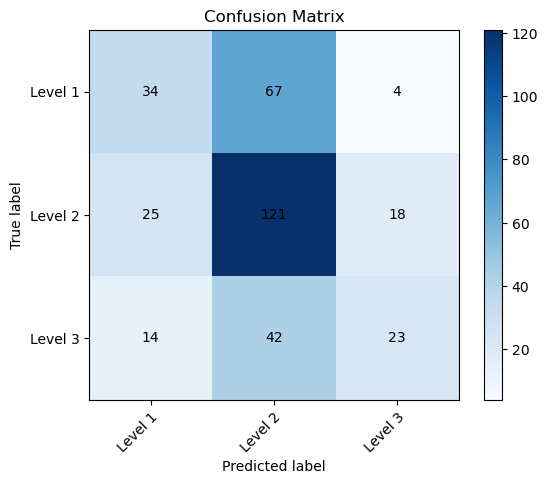

Feature Importance Rankings:
1. no_of_variables: 16.574797163156564
2. word_count_cat: 13.613584139496654
3. words_per_sentence_cat: 12.471924923728828
4. large_words_cat: 12.187401193263801
5. no_of_equations: 9.163041980175686
6. has_pow: 7.074018571324981
7. average_word_length_cat: 6.091266144118358
8. has_symbol: 5.73606756354749
9. has_digits: 4.345634778019868
10. has_fraction: 4.065950819288733
11. sentence_count_cat: 3.4712097684168555
12. has_eq: 2.253609749859844
13. has_neq: 1.6531873023205141
14. has_logarithm: 0.8009591502939607
15. has_mod: 0.49734675298786624
16. has_exp: 0.0
17. type: 0.0


In [11]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE]

scores = rf_model(data1, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Experiment1+GPT+SMOTE")

In [12]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333
2,Experiment1+GPT+SMOTE,0.787788,0.534052


2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5662337999636391
train_evaluation:

              precision    recall  f1-score   support

           1       0.81      0.62      0.70       379
           2       0.75      0.93      0.83       744
           3       0.84      0.57      0.68       265

    accuracy                           0.78      1388
   macro avg       0.80      0.71      0.74      1388
weighted avg       0.79      0.78      0.77      1388

[[236 133  10]
 [ 35 691  18]
 [ 21  94 150]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.47      0.36      0.40        95
           2       0.63      0.72      0.67       200
           3       0.40      0.34      0.37        53

    accuracy                           0.56   

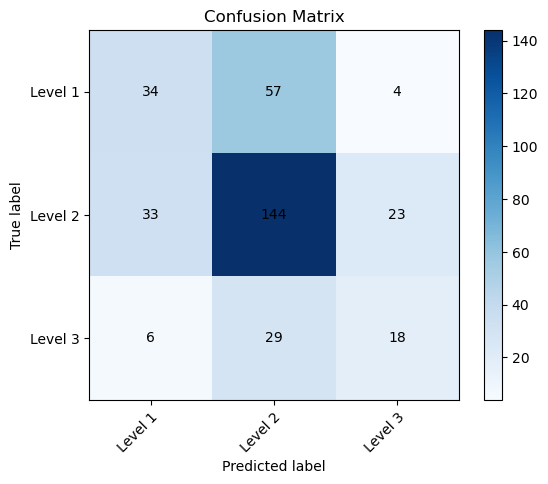

Feature Importance Rankings:
1. no_of_variables: 16.577509518407084
2. word_count_cat: 13.757660126631318
3. large_words_cat: 12.938229367736806
4. words_per_sentence_cat: 12.242978950196658
5. no_of_equations: 9.39515544204077
6. average_word_length_cat: 6.0955043259485135
7. has_symbol: 5.901102074733212
8. has_pow: 5.261670308765278
9. sentence_count_cat: 4.013820285792163
10. has_fraction: 3.7796504778652458
11. has_eq: 2.8852234568617607
12. has_digits: 2.859343909516611
13. has_neq: 2.137011089941506
14. has_mod: 1.3761612108671855
15. has_logarithm: 0.7789794546958901
16. has_exp: 0.0
17. type: 0.0


In [13]:
scores = rf_model(data1, use_smote_technique=0, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Experiment1+GPT")

In [14]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333
2,Experiment1+GPT+SMOTE,0.787788,0.534052
3,Experiment1+GPT,0.784788,0.575071


## Experiment 2: 

Consider the following features

1. Categorised linguistic features
2. All numerical math features

Run Random forest with default 5 class classification and report the results

In [15]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6036251105216623
train_evaluation:

              precision    recall  f1-score   support

           1       0.88      0.76      0.81       730
           2       0.63      0.81      0.71       495
           3       0.85      0.81      0.83       662

    accuracy                           0.79      1887
   macro avg       0.79      0.79      0.78      1887
weighted avg       0.80      0.79      0.79      1887

[[552 135  43]
 [ 44 399  52]
 [ 33  95 534]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.70      0.58      0.63       124
           2       0.45      0.58      0.51 

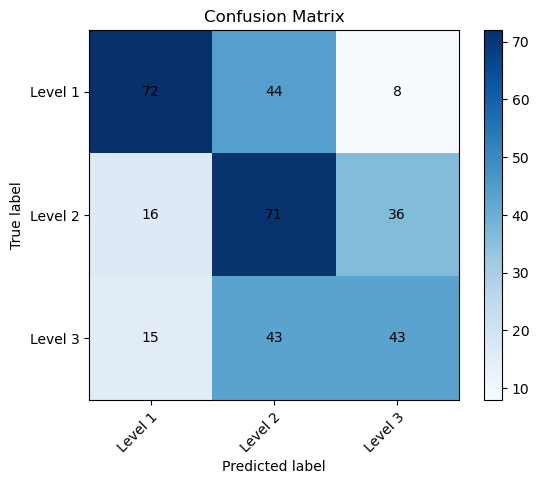

Feature Importance Rankings:
1. large_words_cat: 12.54514199736948
2. no_of_variables: 10.016800963621357
3. word_count_cat: 9.988523742951184
4. words_per_sentence_cat: 9.020050761759062
5. symbol_count: 8.230536865802089
6. no_of_equations: 8.021986555799991
7. max_degree_of_equations: 7.185546004144035
8. number_of_digits: 6.837788944297696
9. number_of_numbers: 6.227959643085597
10. average_word_length_cat: 5.682813550537995
11. no_of_pow: 5.244099406005802
12. sentence_count_cat: 3.5553100054187396
13. fracs_count: 3.367901879599163
14. eqlts_count: 2.060015240502931
15. neqlts_count: 0.867498536926538
16. log_count: 0.5827396589149066
17. mod_count: 0.5652862432634209
18. no_of_exps: 0.0
19. type: 0.0


In [16]:
scores = rf_model(data2, scores=scores, experiment="Experiment2+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5151027192686285
train_evaluation:

              precision    recall  f1-score   support

           1       0.82      0.61      0.70       552
           2       0.53      0.80      0.64       413
           3       0.76      0.63      0.69       423

    accuracy                           0.67      1388
   macro avg       0.70      0.68      0.68      1388
weighted avg       0.72      0.67      0.68      1388

[[338 177  37]
 [ 36 332  45]
 [ 37 120 266]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.71      0.53      0.61       138
           2       0.36      0.53      0.43       107
           3       0.54      0.46      0.49       103

    accuracy                     

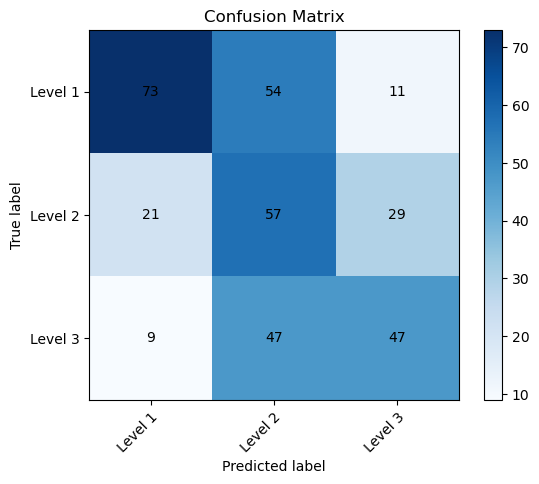

Feature Importance Rankings:
1. word_count_cat: 14.109391938751163
2. large_words_cat: 13.222736347758875
3. no_of_variables: 8.834760510608936
4. no_of_equations: 8.55479715297523
5. symbol_count: 8.17318034345697
6. max_degree_of_equations: 7.751005122222695
7. words_per_sentence_cat: 7.500012981299438
8. number_of_digits: 5.74137450571509
9. number_of_numbers: 5.630496266555234
10. average_word_length_cat: 4.9495200265883925
11. no_of_pow: 4.8552119124013835
12. sentence_count_cat: 3.397351721650394
13. fracs_count: 2.2709692538379693
14. eqlts_count: 2.2493272251715735
15. neqlts_count: 1.589767905514474
16. log_count: 0.7021081897666043
17. mod_count: 0.46798859572559576
18. no_of_exps: 0.0
19. type: 0.0


In [17]:
scores = rf_model(data2, use_smote_technique=0, scores=scores, experiment="Experiment2", club_target=True)

In [18]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333
2,Experiment1+GPT+SMOTE,0.787788,0.534052
3,Experiment1+GPT,0.784788,0.575071
4,Experiment2+SMOTE,0.783197,0.531553
5,Experiment2,0.669638,0.498305


In [19]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE]

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6997254578452401
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.82      0.84       962
           2       0.69      0.88      0.77       714
           3       0.93      0.79      0.85      1078

    accuracy                           0.82      2754
   macro avg       0.82      0.83      0.82      2754
weighted avg       0.84      0.82      0.83      2754

[[789 139  34]
 [ 53 629  32]
 [ 76 150 852]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.44      0.30      0.35       108
           2       0.53      0.70      0.60       174
   

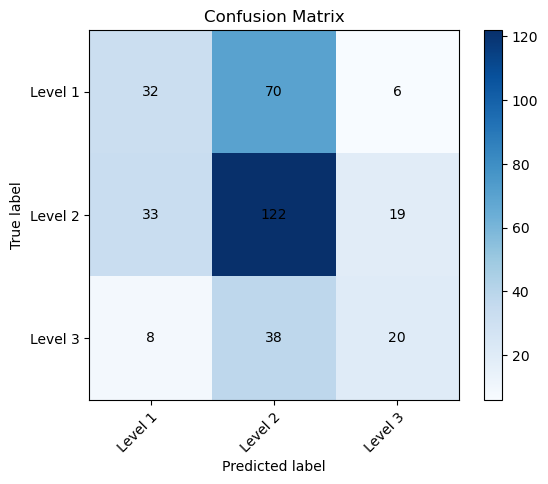

Feature Importance Rankings:
1. word_count_cat: 10.848048525089245
2. words_per_sentence_cat: 10.167337935414752
3. large_words_cat: 10.068649637066548
4. no_of_variables: 9.749360610711191
5. number_of_digits: 8.754751522463287
6. max_degree_of_equations: 8.467825234490972
7. no_of_pow: 7.253637775021198
8. symbol_count: 7.21363853843793
9. number_of_numbers: 6.761386027468512
10. no_of_equations: 5.836312265035284
11. average_word_length_cat: 4.379319339829784
12. fracs_count: 3.639087019612271
13. sentence_count_cat: 2.4903414546855833
14. eqlts_count: 1.6557603357986461
15. neqlts_count: 1.231400524995197
16. log_count: 0.9334832509738988
17. mod_count: 0.5496600029057043
18. no_of_exps: 0.0
19. type: 0.0


In [20]:
scores = rf_model(data2, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Experiment2+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5612186063423629
train_evaluation:

              precision    recall  f1-score   support

           1       0.80      0.66      0.72       355
           2       0.78      0.92      0.84       773
           3       0.88      0.60      0.71       260

    accuracy                           0.79      1388
   macro avg       0.82      0.73      0.76      1388
weighted avg       0.80      0.79      0.79      1388

[[233 119   3]
 [ 42 712  19]
 [ 17  87 156]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.38      0.30      0.34        93
           2       0.64      0.71      0.68       207
           3       0.33      0.31      0.32        48

    accuracy                           0.55       348
  

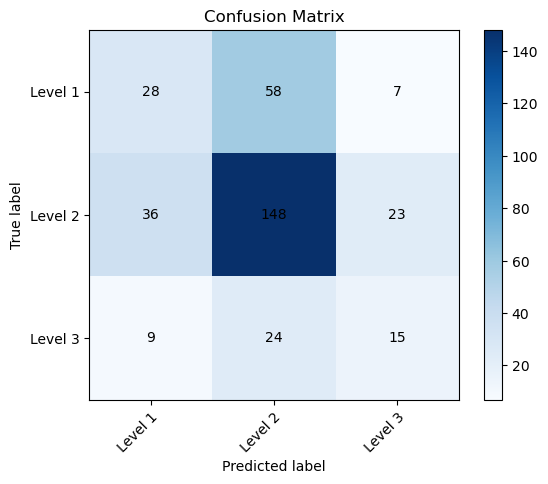

Feature Importance Rankings:
1. large_words_cat: 11.437009644576113
2. word_count_cat: 10.936273919059067
3. number_of_digits: 9.021235335407145
4. no_of_variables: 8.995497061709427
5. words_per_sentence_cat: 8.02768237041167
6. symbol_count: 7.3289801921243205
7. no_of_pow: 7.011560345303952
8. no_of_equations: 6.951798217758758
9. max_degree_of_equations: 6.817109880510729
10. number_of_numbers: 6.316253171284752
11. fracs_count: 4.307140106779488
12. average_word_length_cat: 4.306974508581809
13. sentence_count_cat: 2.5446710006431665
14. eqlts_count: 2.5172431914237308
15. neqlts_count: 1.3187776327423109
16. log_count: 1.2343288367434182
17. mod_count: 0.9274645849401585
18. no_of_exps: 0.0
19. type: 0.0


In [21]:
scores = rf_model(data2, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment2+GPT")

In [22]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333
2,Experiment1+GPT+SMOTE,0.787788,0.534052
3,Experiment1+GPT,0.784788,0.575071
4,Experiment2+SMOTE,0.783197,0.531553
5,Experiment2,0.669638,0.498305
6,Experiment2+GPT+SMOTE,0.821301,0.519940
7,Experiment2+GPT,0.799827,0.560150


## Experiment 3: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features
3. POS features
4. no_of_equations
5. no_of_variables

Run Random Forest on the default 5 class classification and report the results



In [23]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6269532510911822
train_evaluation:

              precision    recall  f1-score   support

           1       0.92      0.80      0.86       728
           2       0.75      0.90      0.82       528
           3       0.89      0.88      0.89       631

    accuracy                           0.85      1887
   macro avg       0.85      0.86      0.85      1887
weighted avg       0.86      0.85      0.86      1887

[[581 105  42]
 [ 26 473  29]
 [ 22  51 558]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.71      0.56      0.62       131
           2       0.48      0.57      0.52 

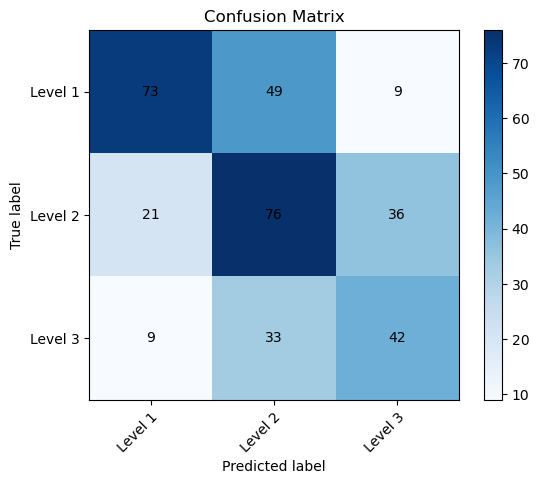

Feature Importance Rankings:
1. no_of_variables: 8.760933551995723
2. NOUN: 7.540255702193371
3. PUNCT: 5.653200022620852
4. ADP: 5.641600185633651
5. ADJ: 5.396534332007276
6. large_words_cat: 5.208326104569512
7. word_count_cat: 5.041373953992428
8. no_of_equations: 5.022044334998402
9. DET: 4.968985458921973
10. VERB: 4.677509076339011
11. has_symbol: 3.987773191325895
12. AUX: 3.7435239288589224
13. words_per_sentence_cat: 3.606380856305492
14. PRON: 3.281353672110655
15. CCONJ: 2.9774426046428912
16. NUM: 2.932269353365175
17. average_word_length_cat: 2.8757599635206925
18. has_pow: 2.829449582784575
19. SCONJ: 2.4572681617965344
20. has_digits: 2.3882256127222816
21. PROPN: 2.3162827419214063
22. ADV: 2.2524996173406637
23. has_fraction: 1.3418176427678927
24. sentence_count_cat: 1.2251719811746755
25. has_eq: 1.086392946609596
26. PART: 0.8208467038388786
27. has_neq: 0.6341919866874842
28. X: 0.48627841538016503
29. has_logarithm: 0.341664732169153
30. SYM: 0.3405875551023189
3

In [24]:
scores = rf_model(data3, scores=scores, experiment="Experiment3+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.54610809547308
train_evaluation:

              precision    recall  f1-score   support

           1       0.89      0.75      0.81       486
           2       0.76      0.89      0.82       537
           3       0.87      0.83      0.85       365

    accuracy                           0.83      1388
   macro avg       0.84      0.82      0.83      1388
weighted avg       0.83      0.83      0.83      1388

[[365 101  20]
 [ 34 478  25]
 [ 12  50 303]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.70      0.57      0.63       126
           2       0.52      0.60      0.56       137
           3       0.53      0.54      0.53        85

    accuracy                    

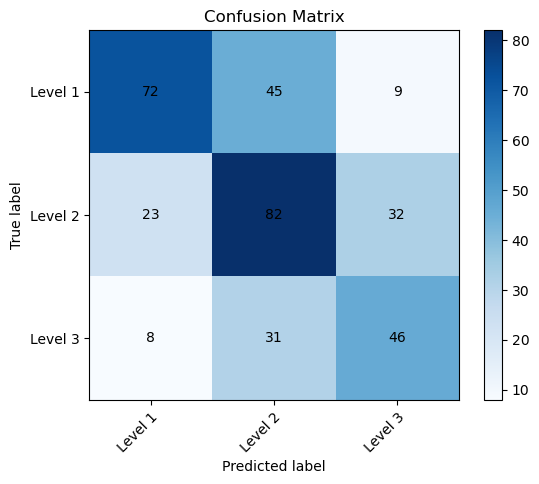

Feature Importance Rankings:
1. large_words_cat: 7.321527745481779
2. no_of_variables: 7.0862021126253
3. NOUN: 6.340378644440217
4. no_of_equations: 5.743785260078219
5. ADJ: 5.692338969746446
6. word_count_cat: 5.642825943120054
7. ADP: 5.160119572168852
8. PUNCT: 4.687411834624555
9. DET: 4.568043374837503
10. AUX: 4.245864013330678
11. VERB: 4.1147259301485954
12. PRON: 3.779608489080072
13. NUM: 3.6898934624185356
14. has_symbol: 3.303601225018566
15. has_pow: 3.1613427289423317
16. words_per_sentence_cat: 2.9100332066413275
17. average_word_length_cat: 2.8214164618064865
18. SCONJ: 2.6855436465936173
19. CCONJ: 2.575360546738951
20. ADV: 2.006216040358889
21. has_eq: 1.9996275919060196
22. PROPN: 1.9980710029405016
23. has_fraction: 1.7741056036126381
24. has_digits: 1.5538959307312559
25. sentence_count_cat: 1.267269212417443
26. has_neq: 1.1013613270867049
27. PART: 0.8710394182974399
28. SYM: 0.6684620940424385
29. X: 0.4695835768157655
30. has_logarithm: 0.443176111203654
31.

In [25]:
scores = rf_model(data3, use_smote_technique=0, scores=scores, experiment="Experiment3", club_target=True)

In [26]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE]

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.7418485398449102
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.81      0.87      1048
           2       0.78      0.91      0.84       786
           3       0.91      0.91      0.91       920

    accuracy                           0.87      2754
   macro avg       0.87      0.88      0.87      2754
weighted avg       0.88      0.87      0.87      2754

[[854 135  59]
 [ 48 714  24]
 [ 16  69 835]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.48      0.34      0.40       104
           2       0.57      0.70      0.63       188
   

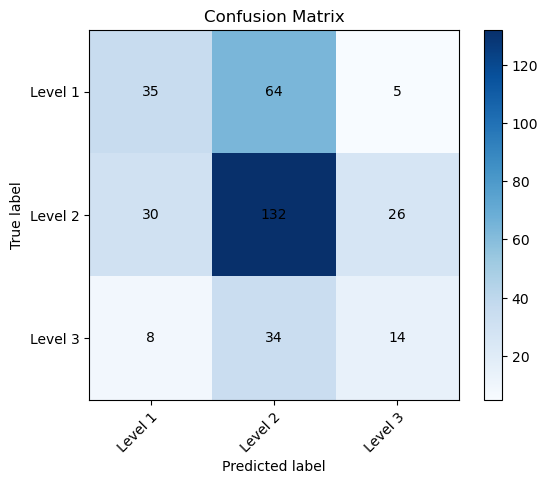

Feature Importance Rankings:
1. no_of_variables: 8.893569012243493
2. NOUN: 6.902784356035152
3. word_count_cat: 6.266596032829708
4. DET: 5.880762895868089
5. ADJ: 5.34404068944687
6. has_pow: 5.107464563316771
7. large_words_cat: 4.940652053098834
8. PUNCT: 4.934974400854831
9. VERB: 4.57269794836701
10. ADP: 4.541459276981666
11. no_of_equations: 4.099818636777555
12. AUX: 3.6615626293160197
13. words_per_sentence_cat: 3.643592403139423
14. NUM: 3.5820479807028347
15. CCONJ: 3.2673560341105774
16. PRON: 3.142555488115432
17. SCONJ: 2.974182321799561
18. has_symbol: 2.792782690830015
19. average_word_length_cat: 2.7042307996333115
20. has_fraction: 2.3604998405998376
21. has_digits: 2.057535663412357
22. PROPN: 1.6017388703340332
23. ADV: 1.5692229573769017
24. has_eq: 1.2469991465006027
25. PART: 0.8981124229263288
26. sentence_count_cat: 0.7758680853460139
27. has_neq: 0.5965333529256829
28. SYM: 0.5731039090515813
29. X: 0.5476494042718513
30. has_logarithm: 0.30429640396860186
31

In [27]:
scores = rf_model(data3, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Experiment3+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6087213983325975
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.66      0.74       381
           2       0.84      0.94      0.89       827
           3       0.87      0.86      0.87       180

    accuracy                           0.85      1388
   macro avg       0.86      0.82      0.83      1388
weighted avg       0.85      0.85      0.84      1388

[[250 123   8]
 [ 38 774  15]
 [  4  21 155]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.37      0.33      0.35        81
           2       0.72      0.69      0.70       242
           3       0.22      0.40      0.29        25

    accuracy                           0.58       348

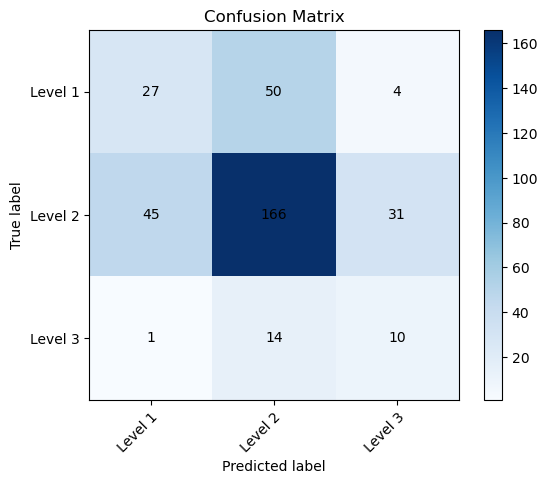

Feature Importance Rankings:
1. NOUN: 6.872739847750277
2. no_of_variables: 6.7263854255154
3. word_count_cat: 6.190372382822702
4. VERB: 5.927468082257119
5. DET: 5.7804038319119275
6. ADJ: 5.609976612231486
7. large_words_cat: 5.4849102574016335
8. ADP: 4.9161271032972245
9. PUNCT: 4.79932837056335
10. PRON: 4.7385335569821025
11. CCONJ: 4.430853176993878
12. words_per_sentence_cat: 3.922612487347906
13. no_of_equations: 3.760206263011607
14. AUX: 3.5275824420098
15. has_pow: 3.38905786405536
16. NUM: 2.9984805179401923
17. SCONJ: 2.7275084479490945
18. average_word_length_cat: 2.3635833915466304
19. ADV: 2.359046737947364
20. PROPN: 2.273283030710764
21. has_symbol: 2.096809895558372
22. has_fraction: 1.9480997331649854
23. has_eq: 1.4428842036517464
24. sentence_count_cat: 1.3226261024166321
25. has_digits: 1.1758968998191601
26. PART: 0.7634767708822343
27. X: 0.7264611510481768
28. has_neq: 0.6428067115380535
29. has_logarithm: 0.4488014725669726
30. has_mod: 0.34288705872318503


In [28]:
scores = rf_model(data3, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment3+GPT")

## Experiment 4: 

Consider the following features

1. Categorised linguistic features
2. Numerical math features
3. POS features

Run Random Forest on the default 5 class classification and report the results



In [29]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + TARGET_FEATURE]

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6274767378215655
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.79      0.86       740
           2       0.76      0.91      0.83       522
           3       0.88      0.89      0.89       625

    accuracy                           0.86      1887
   macro avg       0.86      0.87      0.86      1887
weighted avg       0.87      0.86      0.86      1887

[[587 105  48]
 [ 20 477  25]
 [ 22  47 556]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.65      0.52      0.58       128
           2       0.46      0.56      0.50 

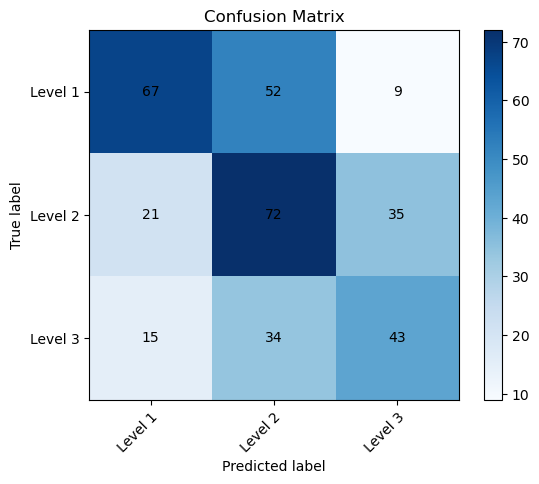

Feature Importance Rankings:
1. max_degree_of_equations: 8.965927594557321
2. NOUN: 6.851049173181517
3. ADJ: 6.023115612915436
4. symbol_count: 5.278618541462031
5. DET: 5.272343669538879
6. large_words_cat: 5.193169939315827
7. no_of_pow: 4.533357391274662
8. ADP: 4.458690214226041
9. VERB: 4.3594287590948
10. PUNCT: 4.181894332193155
11. word_count_cat: 4.1587108554881285
12. number_of_digits: 4.1474746357543
13. words_per_sentence_cat: 3.9442158762033346
14. number_of_numbers: 3.7256152089765724
15. AUX: 3.604098440142535
16. NUM: 3.2473747737193346
17. PRON: 3.2047074691094988
18. average_word_length_cat: 2.574326867630075
19. SCONJ: 2.5240989609592352
20. CCONJ: 2.505064092598092
21. PROPN: 2.015908954386887
22. fracs_count: 1.91158337708863
23. ADV: 1.8725267046132243
24. eqlts_count: 1.535996947718761
25. sentence_count_cat: 1.24930487956454
26. PART: 0.6503381145393303
27. X: 0.6489510589053199
28. neqlts_count: 0.4519633949984557
29. SYM: 0.3806737581522814
30. mod_count: 0.2

In [30]:
scores = rf_model(data4, scores=scores, experiment="Experiment4+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5381528712048411
train_evaluation:

              precision    recall  f1-score   support

           1       0.92      0.75      0.82       504
           2       0.76      0.91      0.83       527
           3       0.88      0.85      0.87       357

    accuracy                           0.84      1388
   macro avg       0.85      0.84      0.84      1388
weighted avg       0.85      0.84      0.84      1388

[[377 108  19]
 [ 25 478  24]
 [  9  43 305]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.68      0.54      0.60       129
           2       0.47      0.53      0.50       140
           3       0.43      0.47      0.45        79

    accuracy                  

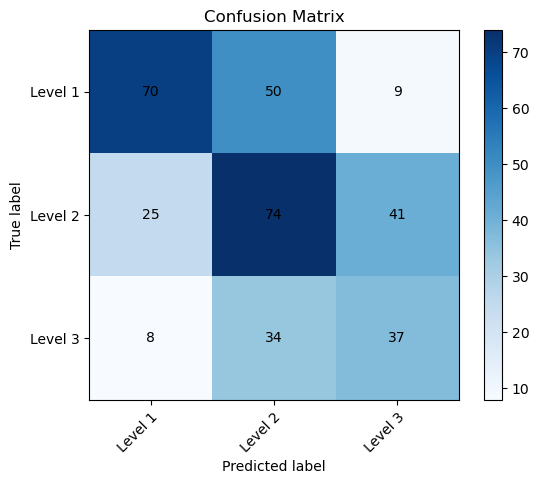

Feature Importance Rankings:
1. max_degree_of_equations: 5.907323118489472
2. ADJ: 5.814563513544701
3. NOUN: 5.749910862212435
4. large_words_cat: 5.712257924963999
5. DET: 5.673801667041495
6. symbol_count: 5.464341490071873
7. VERB: 4.972136844846075
8. word_count_cat: 4.726854318807078
9. number_of_digits: 4.676744248074446
10. ADP: 4.559180516570494
11. no_of_pow: 4.530342814032819
12. PUNCT: 4.153476992470221
13. AUX: 3.763232097441085
14. number_of_numbers: 3.6989149561699035
15. PRON: 3.426267895145906
16. words_per_sentence_cat: 3.0986384297482052
17. NUM: 3.0699470620479734
18. SCONJ: 2.6850334483114846
19. fracs_count: 2.6043961295833067
20. CCONJ: 2.515060538954976
21. average_word_length_cat: 2.3887579726740857
22. eqlts_count: 2.195916390110152
23. ADV: 1.9902099354912353
24. PROPN: 1.796667562234829
25. sentence_count_cat: 1.6631133644091496
26. PART: 0.815133531713106
27. neqlts_count: 0.7507285637287988
28. SYM: 0.5745991589046061
29. mod_count: 0.4683194001334482
30. 

In [31]:
scores = rf_model(data4, use_smote_technique=0, scores=scores, experiment="Experiment4", club_target=True)

In [32]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + GPT_3_TARGET_FEATURE]

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.7342174558653688
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.81      0.85      1021
           2       0.78      0.91      0.84       789
           3       0.91      0.88      0.89       944

    accuracy                           0.86      2754
   macro avg       0.86      0.87      0.86      2754
weighted avg       0.87      0.86      0.86      2754

[[827 121  73]
 [ 56 719  14]
 [ 35  78 831]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.48      0.37      0.42        95
           2       0.63      0.73      0.68       198
      

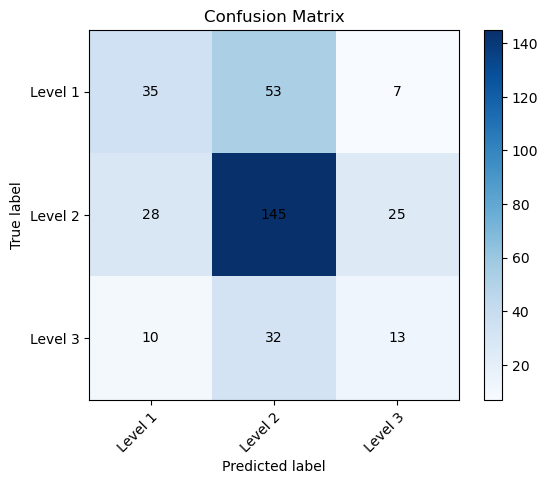

Feature Importance Rankings:
1. NOUN: 6.9062932166808215
2. max_degree_of_equations: 6.655823598119224
3. no_of_pow: 6.002747350018961
4. ADJ: 5.72466841511476
5. large_words_cat: 5.7051062323712465
6. number_of_digits: 5.392919984952329
7. DET: 5.27662354469698
8. symbol_count: 4.960401675814709
9. word_count_cat: 4.90681881038202
10. words_per_sentence_cat: 4.657247792741235
11. number_of_numbers: 4.175093925711066
12. VERB: 3.8652459540229493
13. ADP: 3.812580314469823
14. PUNCT: 3.771187910774993
15. AUX: 3.3780796182023045
16. NUM: 3.1336983554410427
17. CCONJ: 3.1281457344936294
18. PRON: 2.919329919615419
19. SCONJ: 2.744734252545726
20. average_word_length_cat: 2.7126247371828076
21. fracs_count: 2.5742561617077215
22. ADV: 1.4367030564042866
23. PROPN: 1.174069290633919
24. sentence_count_cat: 1.0445250991855786
25. eqlts_count: 0.9020162655082048
26. PART: 0.8571668130230975
27. neqlts_count: 0.823404993080617
28. log_count: 0.4447062909561067
29. SYM: 0.4194497023408777
30. 

In [33]:
scores = rf_model(data4, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Experiment4+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6116224709762876
train_evaluation:

              precision    recall  f1-score   support

           1       0.89      0.66      0.76       391
           2       0.84      0.95      0.89       817
           3       0.88      0.87      0.87       180

    accuracy                           0.86      1388
   macro avg       0.87      0.83      0.84      1388
weighted avg       0.86      0.86      0.85      1388

[[259 123   9]
 [ 31 773  13]
 [  2  22 156]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.38      0.34      0.36        83
           2       0.74      0.70      0.72       242
           3       0.20      0.39      0.26        23

    accuracy                           0.59       348

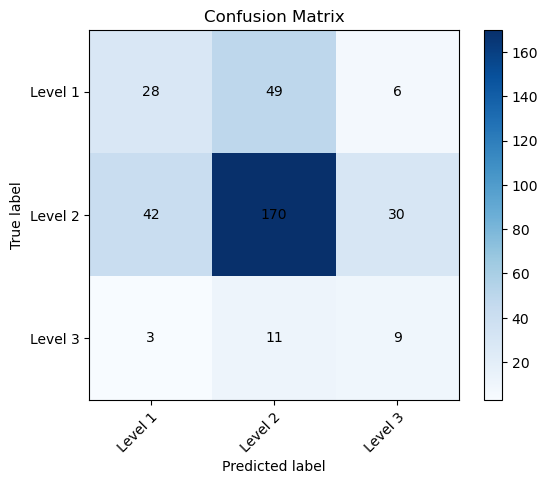

Feature Importance Rankings:
1. NOUN: 6.05682081782948
2. DET: 5.752023778800766
3. number_of_digits: 5.307690415203712
4. max_degree_of_equations: 5.058461590604454
5. word_count_cat: 4.988732484473625
6. no_of_pow: 4.890151559278644
7. ADJ: 4.803905714475464
8. symbol_count: 4.691504968318651
9. ADP: 4.681539330185687
10. PUNCT: 4.633254607874886
11. VERB: 4.599784209950307
12. CCONJ: 4.496918616827979
13. words_per_sentence_cat: 4.337332858167757
14. large_words_cat: 4.321351151371549
15. number_of_numbers: 4.177943445968477
16. AUX: 4.0798310779156886
17. PRON: 3.7577004074406886
18. NUM: 3.1470738649397374
19. fracs_count: 2.8599503981523675
20. ADV: 2.516225695531467
21. SCONJ: 2.0947962836858443
22. average_word_length_cat: 1.9115337990149182
23. PROPN: 1.7054359135134325
24. eqlts_count: 1.3786162476190464
25. PART: 1.0583807821062141
26. sentence_count_cat: 0.7462199518848898
27. log_count: 0.5891922569898556
28. neqlts_count: 0.5688689835563648
29. SYM: 0.27343610585233036
30

In [34]:
scores = rf_model(data4, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment4+GPT")

## Experiment 5

Consider the following features

1. Categorised linguistic features
2. Numerical Math features
3. POS features
4. Math vocab

In [35]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + TARGET_FEATURE]

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6136976688700827
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.77      0.84       763
           2       0.75      0.91      0.82       515
           3       0.88      0.91      0.89       609

    accuracy                           0.85      1887
   macro avg       0.85      0.86      0.85      1887
weighted avg       0.86      0.85      0.85      1887

[[584 119  60]
 [ 29 469  17]
 [ 16  41 552]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.64      0.54      0.58       123
           2       0.44      0.55      0.49 

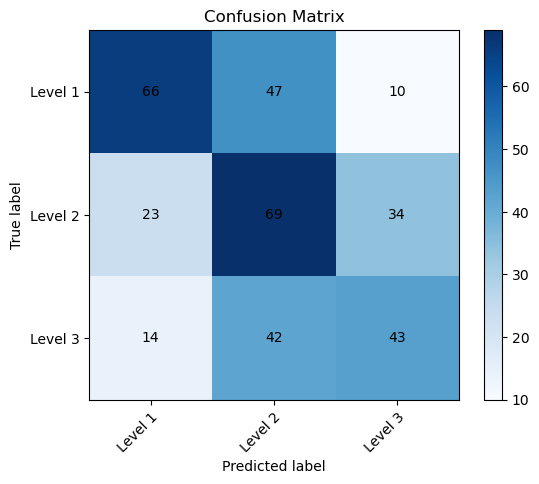

Feature Importance Rankings:
1. max_degree_of_equations: 7.674619670149324
2. NOUN: 6.327424316350565
3. large_words_cat: 5.604846898200131
4. word_count_cat: 5.454468029660568
5. symbol_count: 5.264317322608748
6. DET: 5.2164591656035215
7. number_of_math_vocab: 5.023672986313686
8. VERB: 4.316339080084205
9. number_of_digits: 4.293027184531037
10. ADJ: 4.1720139579802735
11. number_of_numbers: 4.0339618379749975
12. no_of_pow: 3.884345436815527
13. NUM: 3.702184764907384
14. ADP: 3.6441508964076856
15. PUNCT: 3.5942493069241697
16. PRON: 3.2830707392780307
17. words_per_sentence_cat: 3.0819065693268617
18. AUX: 2.9674461986743226
19. SCONJ: 2.8606985801863534
20. average_word_length_cat: 2.536180279340657
21. CCONJ: 2.496525074342098
22. ADV: 1.854053271589188
23. fracs_count: 1.761974496235244
24. PROPN: 1.6008950492353937
25. eqlts_count: 1.559512329072742
26. sentence_count_cat: 0.985263530299484
27. PART: 0.9791022953892418
28. neqlts_count: 0.5358653961941564
29. mod_count: 0.35

In [36]:
scores = rf_model(data5, scores=scores, experiment="Experiment5+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5431992312287355
train_evaluation:

              precision    recall  f1-score   support

           1       0.91      0.72      0.80       518
           2       0.76      0.89      0.82       538
           3       0.85      0.89      0.87       332

    accuracy                           0.82      1388
   macro avg       0.84      0.83      0.83      1388
weighted avg       0.84      0.82      0.82      1388

[[373 124  21]
 [ 29 477  32]
 [  9  28 295]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.73      0.54      0.62       139
           2       0.48      0.58      0.52       132
           3       0.45      0.51      0.48        77

    accuracy                     

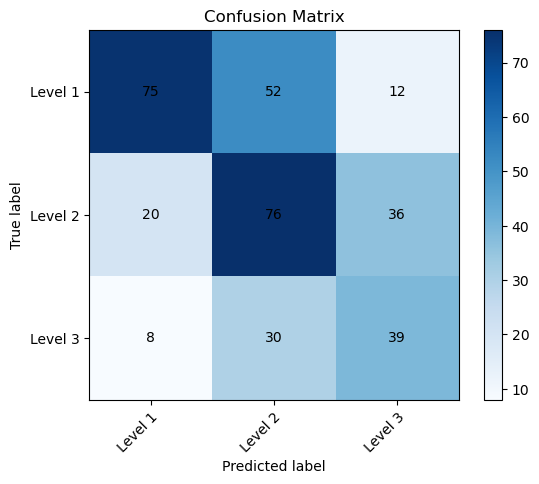

Feature Importance Rankings:
1. max_degree_of_equations: 6.518702923059981
2. large_words_cat: 6.347731016222512
3. number_of_math_vocab: 5.915391854783258
4. NOUN: 5.6046189970620786
5. word_count_cat: 5.308235321529737
6. DET: 5.123082045959069
7. ADJ: 4.465778377172343
8. symbol_count: 4.43472855285255
9. VERB: 4.4243691589751295
10. ADP: 4.203883673856203
11. PUNCT: 4.1213603858152865
12. AUX: 3.9657355270877694
13. no_of_pow: 3.944577825035585
14. PRON: 3.7399628772743285
15. number_of_digits: 3.715139948487493
16. number_of_numbers: 3.1223993913588712
17. NUM: 2.9466698850779354
18. SCONJ: 2.83885720879255
19. words_per_sentence_cat: 2.778791545264871
20. CCONJ: 2.6354863935901243
21. PROPN: 2.1841217946700073
22. average_word_length_cat: 2.068995482247601
23. fracs_count: 1.988956315959219
24. ADV: 1.851678160837042
25. eqlts_count: 1.4418686270711678
26. PART: 1.0175354592654808
27. neqlts_count: 0.8946459060910593
28. sentence_count_cat: 0.8108056404633706
29. mod_count: 0.569

In [37]:
scores = rf_model(data5, use_smote_technique=0, scores=scores, experiment="Experiment5", club_target=True)

In [38]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + GPT_3_TARGET_FEATURE]

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.7385751526150799
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.82      0.87      1047
           2       0.80      0.94      0.86       782
           3       0.92      0.91      0.92       925

    accuracy                           0.88      2754
   macro avg       0.88      0.89      0.88      2754
weighted avg       0.89      0.88      0.88      2754

[[857 126  64]
 [ 41 733   8]
 [ 20  59 846]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.42      0.31      0.36        99
           2       0.64      0.72      0.68       204
   

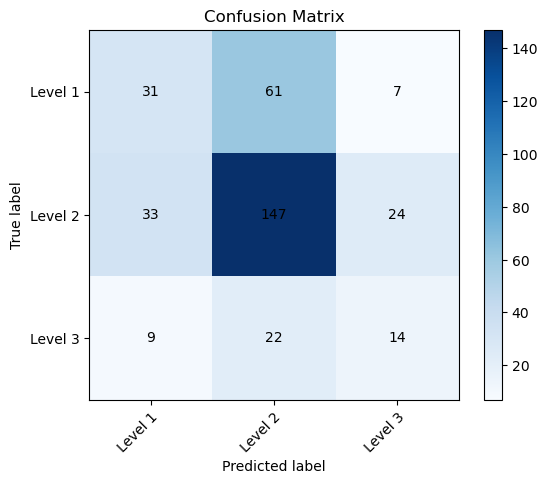

Feature Importance Rankings:
1. max_degree_of_equations: 7.232601823237326
2. number_of_digits: 5.7104455654174675
3. DET: 5.504206557910216
4. large_words_cat: 5.422235492204233
5. word_count_cat: 5.320346566496329
6. NOUN: 5.045137433729653
7. no_of_pow: 5.026660833649206
8. number_of_numbers: 4.846671042142217
9. symbol_count: 4.71465877305606
10. number_of_math_vocab: 4.6446328729869535
11. words_per_sentence_cat: 4.193930876772776
12. ADJ: 4.070245259650984
13. AUX: 3.889307983593594
14. VERB: 3.653926465113778
15. PUNCT: 3.4060660395546725
16. NUM: 3.319565267915793
17. SCONJ: 3.2767571715484562
18. ADP: 3.128677824122393
19. PRON: 3.0635899778919433
20. average_word_length_cat: 2.7737521148589117
21. CCONJ: 2.604675918532991
22. fracs_count: 2.23080943736054
23. PROPN: 1.3194647325868356
24. ADV: 1.256592496681572
25. sentence_count_cat: 0.9382263037273306
26. eqlts_count: 0.8586533356867022
27. PART: 0.5966060275449336
28. neqlts_count: 0.5396251808944892
29. X: 0.4484835393436

In [39]:
scores = rf_model(data5, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Experiment5+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6051268732306573
train_evaluation:

              precision    recall  f1-score   support

           1       0.88      0.65      0.75       394
           2       0.84      0.94      0.89       828
           3       0.85      0.92      0.88       166

    accuracy                           0.85      1388
   macro avg       0.86      0.83      0.84      1388
weighted avg       0.85      0.85      0.85      1388

[[256 130   8]
 [ 35 775  18]
 [  1  13 152]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.36      0.33      0.34        79
           2       0.74      0.68      0.71       252
           3       0.11      0.29      0.16        17

    accuracy                           0.58   

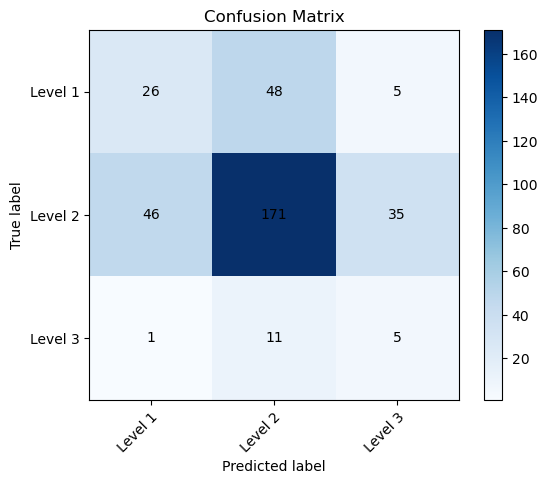

Feature Importance Rankings:
1. DET: 5.725757721135855
2. NOUN: 5.381231986758722
3. number_of_math_vocab: 5.235739373659555
4. number_of_digits: 5.181329750442535
5. word_count_cat: 4.928039775518963
6. large_words_cat: 4.91862569277137
7. ADJ: 4.760651108166782
8. CCONJ: 4.736235714650206
9. max_degree_of_equations: 4.698010794950143
10. no_of_pow: 4.528177539233229
11. symbol_count: 4.44314644122201
12. VERB: 4.18300488959441
13. number_of_numbers: 4.175037997136852
14. PUNCT: 4.155976769132051
15. AUX: 4.0001011823969606
16. ADP: 3.351771621433018
17. PRON: 3.2704976959125283
18. fracs_count: 3.0980693472057714
19. words_per_sentence_cat: 2.947634776871325
20. NUM: 2.9317248904972084
21. SCONJ: 2.195906890516502
22. ADV: 1.9246699847046536
23. average_word_length_cat: 1.8591951026438034
24. PROPN: 1.717523169891941
25. eqlts_count: 1.360433924657193
26. sentence_count_cat: 0.9832261356286491
27. neqlts_count: 0.750364380185363
28. PART: 0.7379117954043519
29. X: 0.6216214575771404


In [40]:
scores = rf_model(data5, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment5+GPT")

In [41]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333
2,Experiment1+GPT+SMOTE,0.787788,0.534052
3,Experiment1+GPT,0.784788,0.575071
4,Experiment2+SMOTE,0.783197,0.531553
5,Experiment2,0.669638,0.498305
6,Experiment2+GPT+SMOTE,0.821301,0.519940
7,Experiment2+GPT,0.799827,0.560150
8,Experiment3+SMOTE,0.853216,0.544629
9,Experiment3,0.825629,0.572243


## Experiment 6

Consider the following features
1. Math (cat/Num)
2. cohmetrix

In [6]:
def get_cohmetrix_merged_data(columns):
    cohmetrix = pd.read_csv("../Data/cohmetrix_final.csv")
    print("Shape of cohmetric features: ", cohmetrix.shape)

    math_data = math_problems[['problem'] + columns]

    print("math features shape: ", math_data.shape)

    data6 = pd.merge(cohmetrix,math_data, on='problem', how='inner')
    data6.drop(columns=['problem'], inplace=True)

    print("final dataframe shape: ", data6.shape)
    return data6

In [49]:
data6 = get_cohmetrix_merged_data(MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 16)
final dataframe shape:  (1736, 121)


5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6550601378187585
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.93      0.93       634
           2       0.84      0.94      0.89       564
           3       0.96      0.88      0.92       689

    accuracy                           0.91      1887
   macro avg       0.91      0.92      0.91      1887
weighted avg       0.92      0.91      0.92      1887

[[590  34  10]
 [ 19 531  14]
 [ 20  64 605]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.57      0.52      0.55       113
           2       0.50      0.53      0.52    

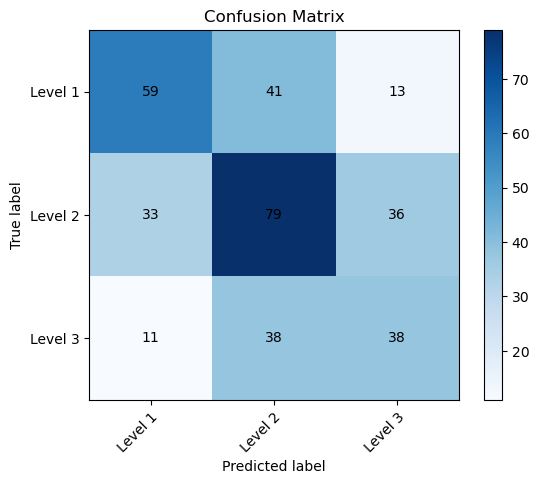

Feature Importance Rankings:
1. CNCAll: 3.52831718245736
2. DESWC: 3.1191544444930925
3. DESWLltd: 2.6461290420378476
4. no_of_variables: 2.5685208980144667
5. DESWLlt: 2.442136082789573
6. WRDMEAc: 2.4286147653424663
7. RDL2: 2.426776556193598
8. WRDADJ: 2.3419339483218327
9. WRDHYPn: 2.2568589247997735
10. WRDPRO: 2.154286017811675
11. PCVERBz: 1.9705693719170736
12. WRDIMGc: 1.9521265808569856
13. PCCONNz: 1.939069996692079
14. LDVOCD: 1.866395010866876
15. DESSL: 1.850164074954945
16. PCSYNp: 1.8499593937170724
17. PCTEMPz: 1.8026031723314333
18. PCSYNz: 1.7664673603990684
19. WRDPOLc: 1.746997504015131
20. RDFKGL: 1.6821528631533653
21. WRDADV: 1.5667280555398522
22. WRDHYPv: 1.5569394624150725
23. PCCNCz: 1.5262427933671394
24. WRDHYPnv: 1.5115730597723867
25. DESWLsyd: 1.4937266986659616
26. WRDAOAc: 1.3994807927918615
27. symbol_count: 1.339603762414623
28. max_degree_of_equations: 1.3292779936437713
29. PCREFp: 1.3269794553501264
30. CNCLogic: 1.3246600664999268
31. DESWLsy: 1

In [50]:
scores = rf_model(data6, scores=scores, experiment="Exp6(num)+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5352933537646418
train_evaluation:

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       410
           2       0.89      0.94      0.92       593
           3       0.95      0.85      0.90       385

    accuracy                           0.91      1388
   macro avg       0.92      0.91      0.91      1388
weighted avg       0.91      0.91      0.91      1388

[[379  25   6]
 [ 20 560  13]
 [ 12  44 329]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.52      0.52      0.52       103
           2       0.56      0.52      0.54       168
           3       0.39      0.44      0.41        77

    accuracy                           0.51

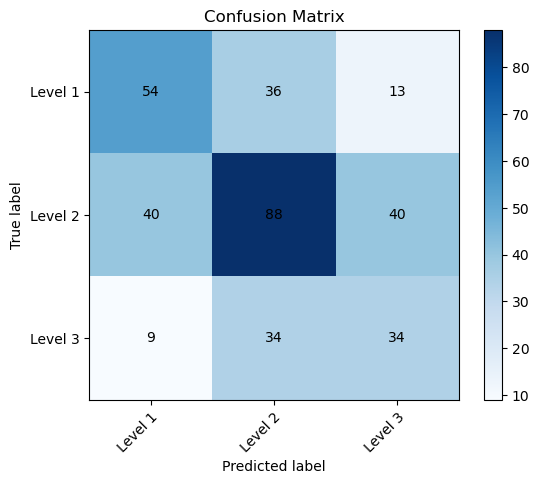

Feature Importance Rankings:
1. DESWC: 3.022360960106581
2. CNCAll: 2.796591060957165
3. DESWLltd: 2.529391445263455
4. no_of_variables: 2.3942646777781067
5. RDL2: 2.3847011960481863
6. WRDMEAc: 2.25898638709495
7. PCVERBz: 2.166781124592974
8. DESSL: 2.125711855548407
9. PCTEMPz: 2.111084992122721
10. PCCNCz: 2.1104734078360825
11. DESWLsyd: 2.0937973403323333
12. PCSYNz: 2.055617393094486
13. WRDADJ: 1.916918728145805
14. RDFKGL: 1.8730088404649423
15. WRDIMGc: 1.8642320381078499
16. WRDHYPv: 1.855744116996988
17. RDFRE: 1.8308473082462786
18. symbol_count: 1.7860219506845723
19. WRDPRO: 1.7410964922595702
20. DESWLlt: 1.7196381364025792
21. WRDFRQmc: 1.695488711132656
22. WRDHYPn: 1.6936441377763356
23. WRDAOAc: 1.6765336468087744
24. DRAP: 1.6681967625913348
25. WRDADV: 1.6582509048455116
26. PCDCz: 1.588636381359103
27. PCNARz: 1.5600445171610982
28. WRDHYPnv: 1.547529354782266
29. PCCONNp: 1.532087515829347
30. PCSYNp: 1.4635760308297063
31. PCCONNz: 1.46056844446574
32. PCREFp:

In [51]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(num)", club_target=True)

In [52]:
data6 = get_cohmetrix_merged_data(MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 16)
final dataframe shape:  (1736, 121)


2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.7683497772644778
train_evaluation:

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       924
           2       0.92      0.94      0.93       892
           3       0.97      0.95      0.96       938

    accuracy                           0.95      2754
   macro avg       0.95      0.95      0.95      2754
weighted avg       0.95      0.95      0.95      2754

[[875  40   9]
 [ 34 841  17]
 [  9  37 892]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.36      0.39      0.37        67
           2       0.64      0.68      0.66       219
      

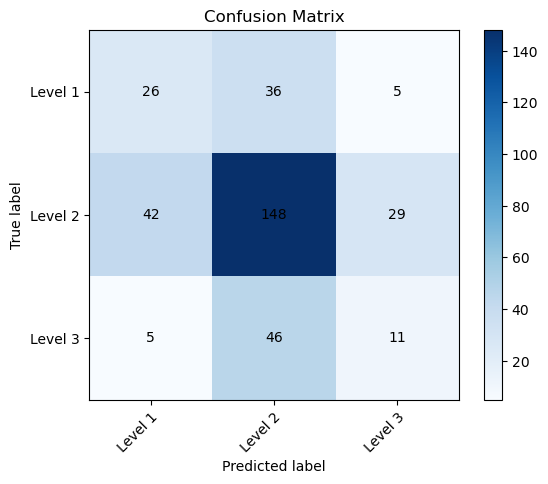

Feature Importance Rankings:
1. CNCAll: 3.9221945958585405
2. DESWLlt: 2.4353200895464737
3. SMTEMP: 2.405358042658455
4. DESWC: 2.3284061241496214
5. RDL2: 2.2959108880071066
6. SYNLE: 2.075579512412635
7. LDVOCD: 1.9156312686947543
8. PCTEMPz: 1.9112748704530187
9. DESSL: 1.8839577916331285
10. RDFKGL: 1.8518559579045917
11. WRDMEAc: 1.8489099617633262
12. no_of_pow: 1.8481235888796195
13. SMINTEp: 1.8434567233759802
14. WRDFRQmc: 1.8362933157572112
15. PCCNCp: 1.7972985593491606
16. PCVERBz: 1.7799210843601678
17. DESWLltd: 1.7791496500209731
18. DRINF: 1.7446723388436287
19. WRDAOAc: 1.728212691280732
20. LDMTLD: 1.566831041289285
21. no_of_variables: 1.5541390264206298
22. SMCAUSwn: 1.5368061614046107
23. PCNARp: 1.492188248350656
24. DRGERUND: 1.4850331801280403
25. PCCONNz: 1.4670102293581235
26. WRDCNCc: 1.4557332706794588
27. SMCAUSr: 1.4056689694267486
28. DESWLsyd: 1.3812656971966377
29. WRDADV: 1.3648057523354016
30. WRDPRO: 1.3638160119224398
31. PCREFp: 1.353300356522779


In [53]:
scores = rf_model(data6, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Exp6(num)+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6325844739370958
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.89      0.90       297
           2       0.94      0.96      0.95       902
           3       0.95      0.89      0.92       189

    accuracy                           0.94      1388
   macro avg       0.93      0.91      0.92      1388
weighted avg       0.94      0.94      0.94      1388

[[264  32   1]
 [ 27 867   8]
 [  1  19 169]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.23      0.46      0.31        37
           2       0.83      0.67      0.74       288
           3       0.07      0.13      0.09        23

    accuracy                           0.61

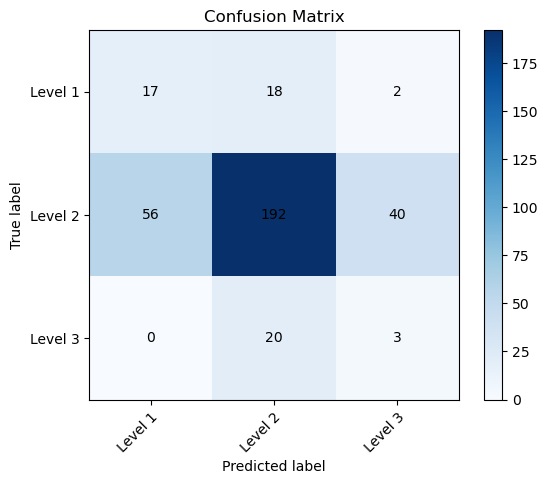

Feature Importance Rankings:
1. PCTEMPz: 2.835402700438701
2. CNCAll: 2.7599004252048704
3. WRDFRQmc: 2.6273446312256286
4. RDL2: 2.5711424237974687
5. DESWC: 2.49812458563067
6. PCREFp: 2.424324183288181
7. DESWLlt: 2.1687648536615494
8. DESWLsyd: 2.1340427814708787
9. WRDAOAc: 2.1313740345577328
10. PCNARz: 2.0942995102951434
11. DESWLltd: 2.033119783805472
12. RDFRE: 2.0045180799955147
13. PCCNCz: 1.9995885398788358
14. WRDADJ: 1.8908192056189483
15. PCDCz: 1.864767573421686
16. PCVERBz: 1.8644257169128124
17. WRDHYPv: 1.8239392931403389
18. LDVOCD: 1.8030580637849334
19. no_of_pow: 1.7913118924520823
20. PCSYNz: 1.762228757054565
21. SMTEMP: 1.6619702865725876
22. WRDIMGc: 1.5979058966647415
23. WRDHYPn: 1.5940788722254808
24. DESWLsy: 1.5590649646790582
25. WRDMEAc: 1.5037054583151142
26. WRDCNCc: 1.4760130002559344
27. WRDHYPnv: 1.464928718535426
28. PCCONNz: 1.4549327204797502
29. WRDADV: 1.4450375040843535
30. DRPP: 1.4218966986193604
31. WRDPRO: 1.3801039535434874
32. number_o

In [54]:
scores = rf_model(data6, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Exp6(num)+GPT")

### Cohmetrix plus math cat

In [8]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 14)
final dataframe shape:  (1736, 119)


5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6450058243161692
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.93      0.94       638
           2       0.88      0.95      0.91       582
           3       0.97      0.91      0.94       667

    accuracy                           0.93      1887
   macro avg       0.93      0.93      0.93      1887
weighted avg       0.93      0.93      0.93      1887

[[594  35   9]
 [ 19 553  10]
 [ 16  41 610]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.62      0.52      0.57       122
           2       0.52      0.57      0.54    

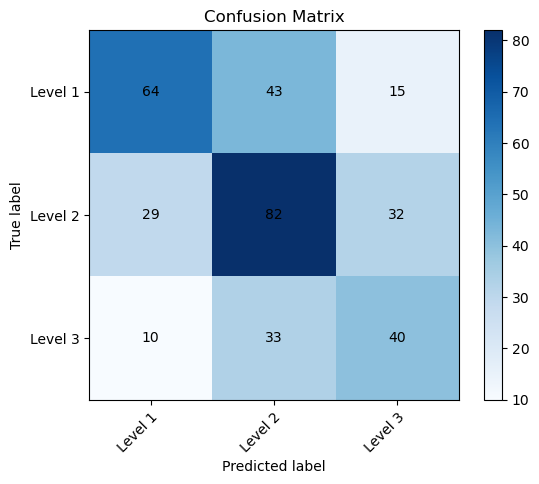

Feature Importance Rankings:
1. DESWC: 3.902489006961036
2. no_of_variables: 3.3529159470454504
3. RDL2: 2.9901164439212873
4. WRDHYPn: 2.5945088565029004
5. DESWLltd: 2.5316619715705997
6. WRDMEAc: 2.415282879781678
7. PCSYNp: 2.2965998243391033
8. PCVERBz: 2.047787252914889
9. WRDADJ: 2.014943853709412
10. WRDIMGc: 1.9783813607014804
11. DESWLlt: 1.862645136377379
12. WRDPRO: 1.8547069705556252
13. DESWLsyd: 1.8367352113845707
14. PCCNCz: 1.821022764687332
15. DESSL: 1.8107744252210634
16. CNCAll: 1.7999773128221972
17. WRDPOLc: 1.7743504983629532
18. WRDPRP1s: 1.7497933390908154
19. PCSYNz: 1.7375429172884087
20. PCNARz: 1.7292773805928745
21. WRDADV: 1.721193898915466
22. SMTEMP: 1.6607549420781507
23. WRDHYPv: 1.6468677450245903
24. RDFKGL: 1.6317843446132079
25. WRDAOAc: 1.5265644042763347
26. PCCONNz: 1.5130270152663465
27. LDVOCD: 1.5010984095928264
28. no_of_equations: 1.4275813576449037
29. WRDHYPnv: 1.4047387148148212
30. RDFRE: 1.399943842248937
31. WRDFRQmc: 1.398107121467

In [56]:
scores = rf_model(data6, scores=scores, experiment="Exp6(cat)+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5410305690465678
train_evaluation:

              precision    recall  f1-score   support

           1       0.81      0.76      0.78       441
           2       0.67      0.82      0.74       519
           3       0.82      0.66      0.73       428

    accuracy                           0.75      1388
   macro avg       0.77      0.75      0.75      1388
weighted avg       0.76      0.75      0.75      1388

[[334  93  14]
 [ 46 423  50]
 [ 31 113 284]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.55      0.46      0.50       124
           2       0.42      0.50      0.46       134
           3       0.41      0.40      0.41        90

    accuracy                           0.4

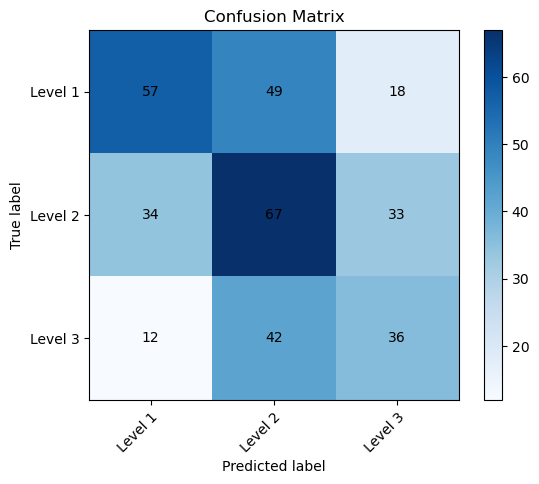

Feature Importance Rankings:
1. CNCAll: 4.125792421647411
2. RDL2: 3.7690808698821985
3. DESWLltd: 3.7153555519864163
4. DESWC: 3.5336031556158076
5. no_of_variables: 3.144070600132605
6. PCSYNp: 2.967496698898778
7. WRDADJ: 2.8950211564253414
8. WRDMEAc: 2.4971142333205334
9. WRDPOLc: 2.3286017462146162
10. PCTEMPz: 2.2808968166677057
11. DESSL: 2.265194491686482
12. PCCNCz: 2.1028097696333248
13. RDFKGL: 2.01832456986734
14. WRDIMGc: 1.9633689298730403
15. DESWLlt: 1.9578824471536762
16. WRDPRO: 1.8741245334690404
17. PCSYNz: 1.8642676269877763
18. WRDAOAc: 1.8532977586510329
19. has_symbol: 1.8427597566631135
20. WRDHYPn: 1.8344275309134472
21. WRDADV: 1.6364640171768297
22. PCVERBz: 1.6325786254109913
23. DESWLsyd: 1.486264263036025
24. WRDCNCc: 1.4542790399195518
25. SMINTEp: 1.451139451956982
26. RDFRE: 1.4168503540916924
27. WRDFRQmc: 1.3696134612002562
28. no_of_equations: 1.3264813794109818
29. PCREFp: 1.2687716490556067
30. DRAP: 1.2628703103852996
31. WRDHYPnv: 1.24796627181

In [57]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(cat)", club_target=True)

Class distribution before SMOTE: Counter({2: 587, 1: 388, 3: 289})
Class distribution after SMOTE: Counter({2: 587, 1: 587, 3: 587})
train_evaluation:

              precision    recall  f1-score   support

         1.0       0.47      0.57      0.51       486
         2.0       0.01      1.00      0.03         8
         3.0       0.91      0.42      0.58      1267

    accuracy                           0.47      1761
   macro avg       0.47      0.66      0.37      1761
weighted avg       0.79      0.47      0.56      1761

[[275 160  51]
 [  0   8   0]
 [312 419 536]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.41      0.44      0.43        91
         2.0       0.01      1.00      0.01         1
         3.0       0.84      0.27      0.41       225

    accuracy                           0.32       317
   macro avg       0.42      0.57      0.28       317
weighted avg       0.71      0.32      0.41       317

[[ 40  39  12]
 [  0 

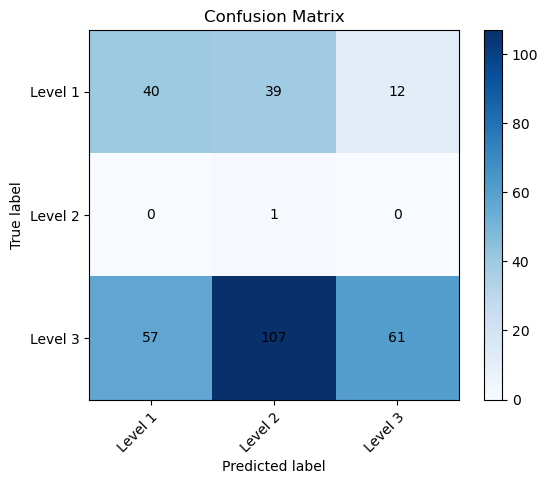

None


In [7]:
scores = Naive_Bayes_Model(data6, scores=scores, experiment="Exp6(cat)NB+SMOTE", club_target=True)

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.48      0.51      0.50       366
         2.0       0.01      1.00      0.02         7
         3.0       0.90      0.29      0.44       891

    accuracy                           0.36      1264
   macro avg       0.47      0.60      0.32      1264
weighted avg       0.77      0.36      0.46      1264

[[188 149  29]
 [  0   7   0]
 [200 431 260]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.40      0.45      0.43        86
         2.0       0.01      1.00      0.01         1
         3.0       0.86      0.27      0.42       230

    accuracy                           0.32       317
   macro avg       0.42      0.58      0.29       317
weighted avg       0.74      0.32      0.42       317

[[ 39  37  10]
 [  0   1   0]
 [ 58 109  63]]


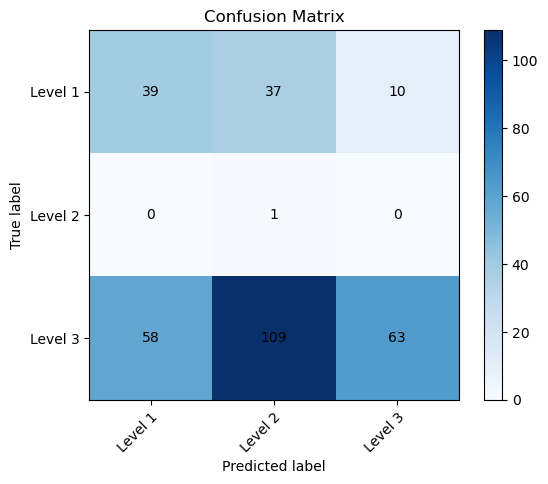

None


In [10]:
scores = Naive_Bayes_Model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(cat)NB", club_target=True)

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 25, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.5309586266005246
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       439
           2       0.92      0.98      0.95       588
           3       0.97      0.94      0.96       361

    accuracy                           0.95      1388
   macro avg       0.95      0.94      0.95      1388
weighted avg       0.95      0.95      0.95      1388

[[399  36   4]
 [  7 576   5]
 [  5  17 339]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.59      0.54      0.56       113
           2       0.53      0.54      0.53       153
           3       0.43      0.45      0.44        82

    accuracy                           0.52       348
   macro avg       0.51      0.51      0.51       348
weighted avg

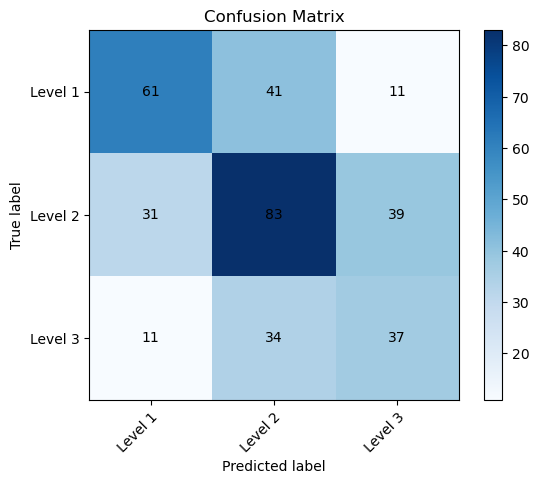

In [9]:
scores = light_GBM(data6, club_target=True, use_smote_technique=0, scores=scores, experiment="Experiment6 LGBM")

Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.6630247147488527
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.96      0.97       642
           2       0.97      0.98      0.97       620
           3       0.99      0.99      0.99       625

    accuracy                           0.98      1887
   macro avg       0.98      0.98      0.98      1887
weighted avg       0.98      0.98      0.98      1887

[[619  18   5]
 [  8 608   4]
 [  2   3 620]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.54      0.55       108
           2       0.58      0.56      0.57       165
           3       0.45      0.52      0.48        75

    accuracy   

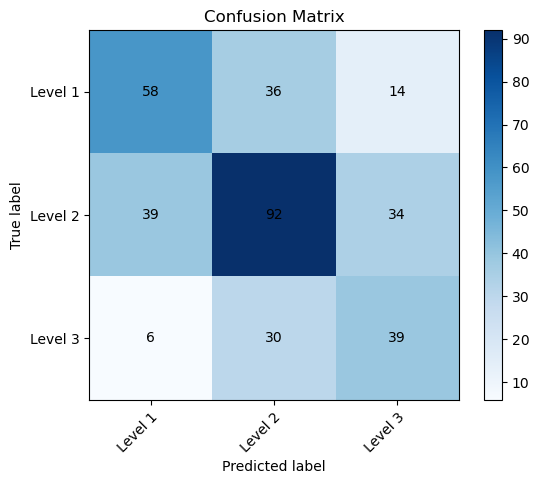

In [10]:
scores = light_GBM(data6, club_target=True, scores=scores, experiment="Experiment6 LGBM + SMOTE")

In [11]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 14)
final dataframe shape:  (1581, 119)


Class distribution before SMOTE: Counter({2: 836, 1: 283, 3: 145})
Class distribution after SMOTE: Counter({2: 836, 3: 836, 1: 836})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.775140555542302
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.93      0.94       843
           2       0.93      0.93      0.93       834
           3       0.95      0.95      0.95       831

    accuracy                           0.94      2508
   macro avg       0.94      0.94      0.94      2508
weighted avg       0.94      0.94      0.94      2508

[[788  39  16]
 [ 33 774  27]
 [ 15  23 793]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.25      0.28      0.26        65
           2       0.70      0.68      0.69       216
           3       0.31      0.31      0.31        36

    accura

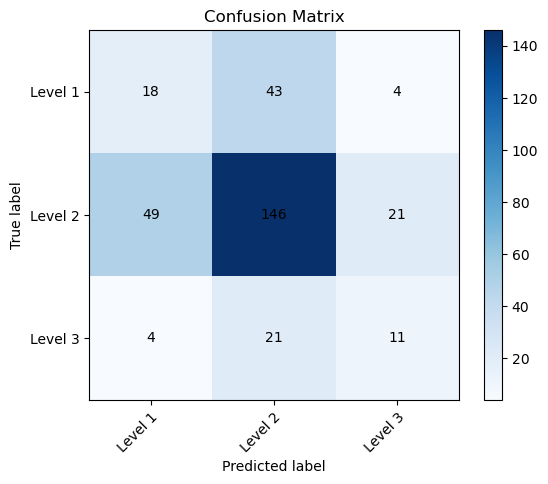

Feature Importance Rankings:
1. DRGERUND: 3.3190111269590976
2. DESWC: 3.2187574866540647
3. WRDPRP1s: 2.824794547292023
4. PCVERBz: 2.736796212061825
5. WRDHYPv: 2.531114723499269
6. has_pow: 2.4334720771957046
7. DESSL: 2.4191265206740242
8. LDMTLD: 2.3554718804575194
9. CNCAll: 2.140473920451358
10. SMCAUSwn: 1.9846364384867237
11. PCNARz: 1.9321545454954676
12. WRDAOAc: 1.9140131074497544
13. PCTEMPz: 1.8846830654592366
14. WRDCNCc: 1.8262021476529295
15. PCSYNz: 1.7741496796118001
16. PCSYNp: 1.7567918264000202
17. SYNLE: 1.7495164896408566
18. RDFKGL: 1.7293300510469112
19. PCNARp: 1.725489016604502
20. no_of_variables: 1.6945801770632323
21. DESWLltd: 1.651769215278343
22. PCDCz: 1.621670378357593
23. DRPP: 1.598191771335555
24. DESWLlt: 1.5954198747559691
25. WRDFRQmc: 1.5933235609097214
26. PCCNCz: 1.576809671273394
27. WRDADJ: 1.5650362398657331
28. PCCONNp: 1.5511686130472009
29. WRDIMGc: 1.4598006293146464
30. PCCONNz: 1.4292440782494111
31. SYNMEDwrd: 1.426299781533225
32.

In [12]:
scores = rf_model(data6, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Exp6(cat)+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.633280523595564
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.89      0.90       295
           2       0.95      0.96      0.95       915
           3       0.92      0.92      0.92       178

    accuracy                           0.94      1388
   macro avg       0.92      0.92      0.92      1388
weighted avg       0.94      0.94      0.94      1388

[[263  30   2]
 [ 29 874  12]
 [  0  14 164]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.27      0.41      0.33        49
           2       0.82      0.67      0.74       280
           3       0.07      0.16      0.09        19

    accuracy                           0.61       348


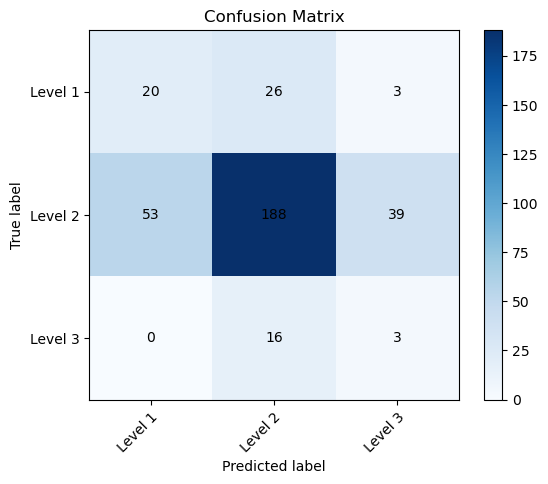

Feature Importance Rankings:
1. CNCAll: 3.307305459143989
2. DESWLlt: 3.0763318570349556
3. PCTEMPz: 3.000852022279876
4. DESWC: 2.7092020876558665
5. WRDFRQmc: 2.512870685641952
6. PCVERBz: 2.4044836661926836
7. PCREFz: 2.328116796561286
8. WRDPOLc: 2.0295264633133563
9. DESWLltd: 2.0203507873127657
10. WRDAOAc: 2.016430318137676
11. PCDCz: 1.923012897876649
12. DESWLsy: 1.8986708087248425
13. WRDCNCc: 1.8739257385316899
14. PCCONNp: 1.862024719782568
15. PCNARz: 1.8274865125045872
16. PCCNCz: 1.8269526369717297
17. WRDHYPv: 1.8205110160171307
18. DRPP: 1.7957907886772053
19. no_of_variables: 1.7468269908429808
20. WRDHYPn: 1.7383318378835229
21. WRDHYPnv: 1.7060495421431372
22. SMTEMP: 1.6921266658927605
23. WRDMEAc: 1.6866468388667848
24. PCREFp: 1.6821794479600205
25. RDL2: 1.6620435439674124
26. PCSYNz: 1.6044563979673587
27. WRDADJ: 1.592017491647815
28. PCNARp: 1.5501689594897425
29. DESSL: 1.54988147796896
30. RDFKGL: 1.5481962334850883
31. RDFRE: 1.5287302363098607
32. DRAP: 1

In [60]:
scores = rf_model(data6, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Exp6(cat)+GPT")

### Math cat + num features

In [61]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({2: 629, 1: 411, 3: 348})
Class distribution after SMOTE: Counter({3: 629, 2: 629, 1: 629})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6534826603792121
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.93      0.93       640
           2       0.85      0.95      0.90       566
           3       0.96      0.89      0.92       681

    accuracy                           0.92      1887
   macro avg       0.92      0.92      0.92      1887
weighted avg       0.92      0.92      0.92      1887

[[593  37  10]
 [ 15 537  14]
 [ 21  55 605]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.62      0.52      0.57       122
           2       0.49      0.55      0.52 

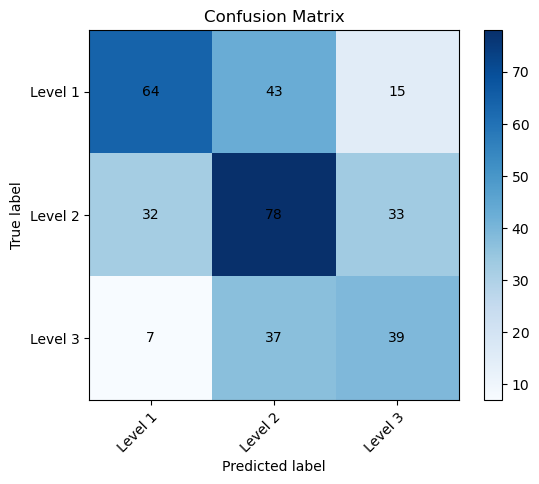

Feature Importance Rankings:
1. DESWC: 3.839557822959826
2. DESWLltd: 3.170510649092864
3. no_of_variables: 2.74238200967078
4. LDVOCD: 2.618562692963093
5. WRDMEAc: 2.506744042515685
6. RDL2: 2.4613984851371433
7. WRDPOLc: 2.343341131040561
8. WRDADJ: 2.2532798082424543
9. PCSYNp: 2.1676816280407945
10. max_degree_of_equations: 2.147824545224338
11. DESSL: 1.86824637929271
12. DESWLlt: 1.7933268240363545
13. PCVERBz: 1.7112563921372215
14. WRDPRO: 1.6913138150673035
15. PCTEMPz: 1.6858747966649605
16. WRDIMGc: 1.6480833767693963
17. WRDFRQmc: 1.6006105169766207
18. WRDHYPn: 1.5561897591606866
19. DRPP: 1.500025393239918
20. RDFKGL: 1.4973555570027521
21. WRDAOAc: 1.4599817829642638
22. SMTEMP: 1.436360188908486
23. PCREFz: 1.4184760195377664
24. PCCONNz: 1.413421763487714
25. WRDHYPnv: 1.4128841996443986
26. PCCNCz: 1.407259382114945
27. WRDHYPv: 1.3935133719134243
28. PCCONNp: 1.376144447814685
29. no_of_equations: 1.3759906342167663
30. DRAP: 1.357079706778951
31. DESWLsyd: 1.333779

In [62]:
scores = rf_model(data6, scores=scores, experiment="Exp(cat+num)+SMOTE", club_target=True)

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5403371165883178
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.92      0.92       416
           2       0.89      0.94      0.91       590
           3       0.95      0.87      0.91       382

    accuracy                           0.91      1388
   macro avg       0.92      0.91      0.91      1388
weighted avg       0.92      0.91      0.91      1388

[[381  31   4]
 [ 21 557  12]
 [  9  41 332]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.52      0.54       112
           2       0.53      0.53      0.53       158
           3       0.43      0.47      0.45        78

    accuracy                  

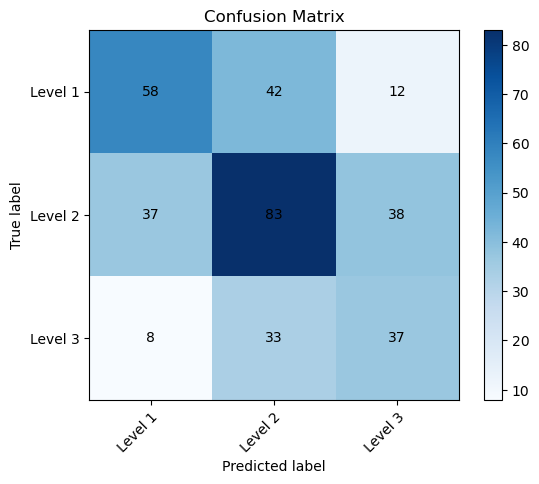

Feature Importance Rankings:
1. DESWC: 3.636147164679878
2. DESWLltd: 3.1578916727089243
3. DESWLlt: 2.6574590369466837
4. DESSL: 2.6236761370102
5. PCCNCz: 2.45339987271848
6. RDL2: 2.4247453599742057
7. WRDIMGc: 2.4190419836522636
8. WRDPOLc: 2.3335471445726967
9. WRDMEAc: 2.2570887545544944
10. PCTEMPz: 2.1623039296346884
11. PCCONNz: 1.9600825313303691
12. PCSYNz: 1.9088666324560992
13. PCSYNp: 1.9085058467034102
14. PCREFz: 1.9071632779733365
15. WRDFRQmc: 1.8967243523723536
16. symbol_count: 1.8256676744515872
17. RDFKGL: 1.8067332407939019
18. WRDADV: 1.761434118571897
19. WRDHYPnv: 1.6887488454615276
20. no_of_variables: 1.642606574981785
21. DESWLsyd: 1.6407197550409078
22. DESWLsy: 1.61998168968047
23. WRDADJ: 1.580771714112946
24. DRPP: 1.5774097327622927
25. PCVERBz: 1.5510587698048
26. CNCAll: 1.5068899958443456
27. WRDAOAc: 1.4436232725930187
28. no_of_equations: 1.3995819371900193
29. DRNEG: 1.3531297698370726
30. WRDHYPn: 1.352313019098918
31. PCNARz: 1.3499730026830505

In [63]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(cat+num)", club_target=True)

### Math Best + Cometrix

In [7]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 14)
final dataframe shape:  (1736, 119)


#### Random Forest

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5410305690465678
OOB Score:  0.47982708933717577
train_evaluation:

              precision    recall  f1-score   support

           1       0.81      0.76      0.78       441
           2       0.67      0.82      0.74       519
           3       0.82      0.66      0.73       428

    accuracy                           0.75      1388
   macro avg       0.77      0.75      0.75      1388
weighted avg       0.76      0.75      0.75      1388

[[334  93  14]
 [ 46 423  50]
 [ 31 113 284]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.55      0.46      0.50       124
           2       0.42      0.50      0.46       134
           3       0.41      0.40      0.41        90

    accuracy                           0.46       348
   macro avg       0.46    

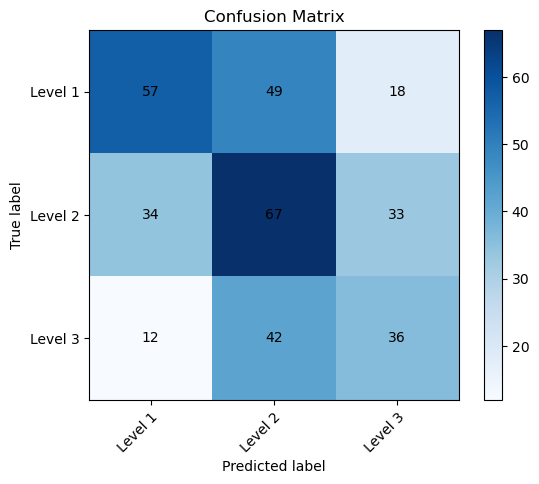

Feature Importance Rankings:
1. CNCAll: 4.125792421647411
2. RDL2: 3.7690808698821985
3. DESWLltd: 3.7153555519864163
4. DESWC: 3.5336031556158076
5. no_of_variables: 3.144070600132605
6. PCSYNp: 2.967496698898778
7. WRDADJ: 2.8950211564253414
8. WRDMEAc: 2.4971142333205334
9. WRDPOLc: 2.3286017462146162
10. PCTEMPz: 2.2808968166677057
11. DESSL: 2.265194491686482
12. PCCNCz: 2.1028097696333248
13. RDFKGL: 2.01832456986734
14. WRDIMGc: 1.9633689298730403
15. DESWLlt: 1.9578824471536762
16. WRDPRO: 1.8741245334690404
17. PCSYNz: 1.8642676269877763
18. WRDAOAc: 1.8532977586510329
19. has_symbol: 1.8427597566631135
20. WRDHYPn: 1.8344275309134472
21. WRDADV: 1.6364640171768297
22. PCVERBz: 1.6325786254109913
23. DESWLsyd: 1.486264263036025
24. WRDCNCc: 1.4542790399195518
25. SMINTEp: 1.451139451956982
26. RDFRE: 1.4168503540916924
27. WRDFRQmc: 1.3696134612002562
28. no_of_equations: 1.3264813794109818
29. PCREFp: 1.2687716490556067
30. DRAP: 1.2628703103852996
31. WRDHYPnv: 1.24796627181

In [8]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, club_target=True, experiment="Experiment6 RF")

#### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.93      0.33      0.49      1153
         2.0       0.07      0.48      0.12        91
         3.0       0.20      0.49      0.29       144

    accuracy                           0.36      1388
   macro avg       0.40      0.44      0.30      1388
weighted avg       0.80      0.36      0.44      1388

[[381 534 238]
 [  8  44  39]
 [ 22  51  71]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.87      0.30      0.45       299
         2.0       0.06      0.45      0.11        22
         3.0       0.11      0.37      0.18        27

    accuracy                           0.32       348
   macro avg       0.35      0.38      0.24       348
weighted avg       0.76      0.32      0.41       348

[[ 90 139  70]
 [  5  10   7]
 [  8   9  10]]


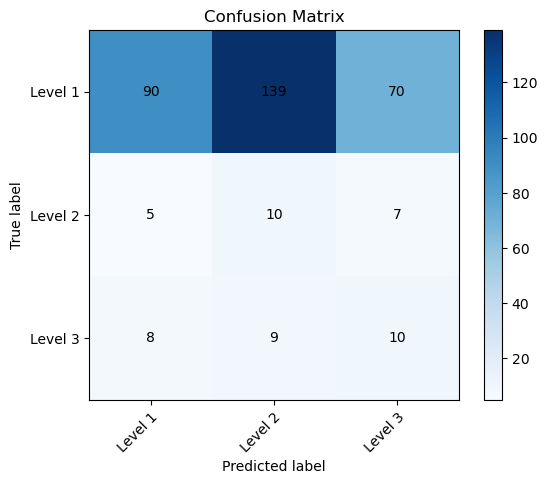

None


In [9]:
scores = Naive_Bayes_Model(data6, use_smote_technique=0, scores=scores, club_target=True, experiment="Experiment6 NB")

#### Light GBM

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 25, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.5309586266005246
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       439
           2       0.92      0.98      0.95       588
           3       0.97      0.94      0.96       361

    accuracy                           0.95      1388
   macro avg       0.95      0.94      0.95      1388
weighted avg       0.95      0.95      0.95      1388

[[399  36   4]
 [  7 576   5]
 [  5  17 339]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.59      0.54      0.56       113
           2       0.53      0.54      0.53       153
           3       0.43      0.45      0.44        82

    accuracy                           0.52       348
   macro avg       0.51      0.51      0.51       348
weighted avg

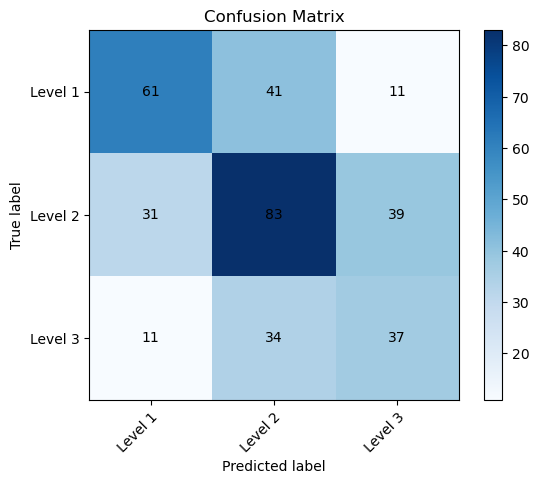

In [10]:
scores = light_GBM(data6, scores=scores, use_smote_technique=0, club_target=True,  experiment="Experiment6 LGBM")

In [64]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.7781527800692956
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.93      0.95       953
           2       0.91      0.95      0.93       875
           3       0.97      0.96      0.97       926

    accuracy                           0.95      2754
   macro avg       0.95      0.95      0.95      2754
weighted avg       0.95      0.95      0.95      2754

[[891  53   9]
 [ 23 834  18]
 [  4  31 891]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.40      0.41      0.41        70
           2       0.65      0.68      0.67       221
   

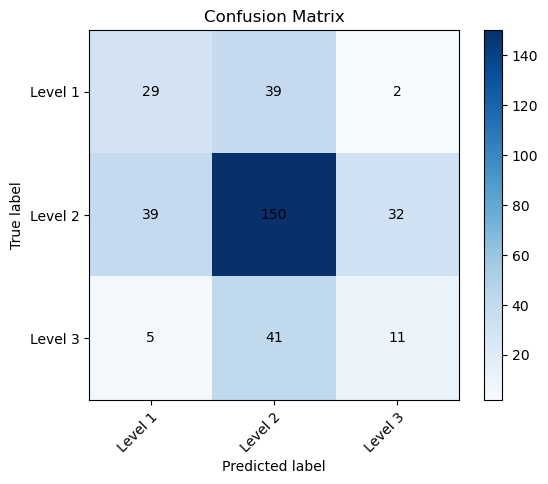

Feature Importance Rankings:
1. DESWC: 3.914871662122818
2. SMTEMP: 2.6290067603545824
3. DESWLlt: 2.4385256684180803
4. WRDFRQmc: 2.3116458185431847
5. has_pow: 2.262111750779224
6. no_of_pow: 2.224752071602166
7. WRDAOAc: 2.119730165908779
8. WRDHYPv: 1.9478257028066448
9. RDFKGL: 1.8261405772365575
10. CNCAll: 1.8035122501767542
11. PCCNCz: 1.7776693550236293
12. PCSYNz: 1.773578225945803
13. DESSL: 1.7381722275794154
14. WRDMEAc: 1.6734215300677344
15. SYNMEDpos: 1.5946235968738218
16. LDVOCD: 1.5855470072539073
17. SMCAUSwn: 1.5844616424352171
18. PCSYNp: 1.5456833026924155
19. PCVERBz: 1.527647556380876
20. PCCONNz: 1.5193697268439328
21. PCNARz: 1.4985217144099723
22. DESWLltd: 1.4981807895638168
23. DESWLsy: 1.492333528243347
24. RDL2: 1.4613628326669164
25. WRDCNCc: 1.411422059642185
26. RDFRE: 1.4071308502533886
27. PCDCz: 1.4043681074701724
28. DRINF: 1.3817447994799665
29. PCCNCp: 1.3353696671862298
30. PCTEMPz: 1.2820445443144315
31. WRDHYPnv: 1.2506924174202927
32. DRPP: 

In [65]:
scores = rf_model(data6, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Exp6(cat+num)+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6390463080798898
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.83      0.86       314
           2       0.93      0.96      0.94       891
           3       0.93      0.91      0.92       183

    accuracy                           0.92      1388
   macro avg       0.92      0.90      0.91      1388
weighted avg       0.92      0.92      0.92      1388

[[262  50   2]
 [ 30 851  10]
 [  0  17 166]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.23      0.35      0.28        48
           2       0.83      0.67      0.74       283
           3       0.09      0.24      0.13        17

    accuracy                           0.61

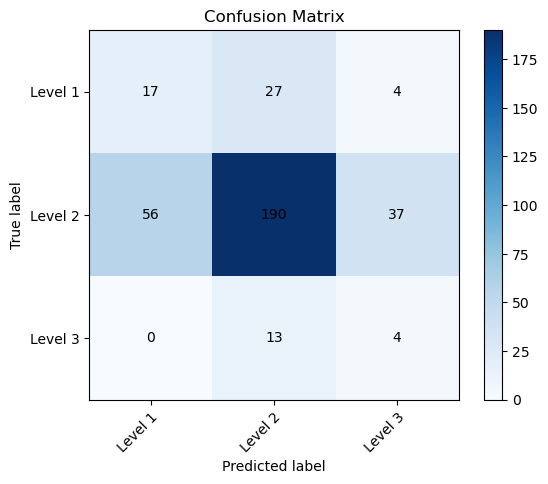

Feature Importance Rankings:
1. DESWC: 2.79308653877901
2. WRDFRQmc: 2.717346128220506
3. WRDHYPv: 2.6944278654813822
4. CNCAll: 2.693421892707322
5. DESWLlt: 2.2776961555862596
6. DESWLltd: 2.1823382607274286
7. PCVERBz: 2.143981975445149
8. PCCNCz: 2.003933519645253
9. RDL2: 1.9743990702098095
10. PCSYNp: 1.9432297403336911
11. PCDCz: 1.9014487784136538
12. PCSYNz: 1.892072672111226
13. SMTEMP: 1.892018939657684
14. LDVOCD: 1.8893717805711123
15. no_of_pow: 1.8500844062281228
16. WRDAOAc: 1.8380334507047058
17. DESWLsyd: 1.7235901068520532
18. PCNARz: 1.643979802736778
19. WRDPOLc: 1.631383230647773
20. PCTEMPz: 1.6300950529609053
21. DESSL: 1.5767210636161748
22. WRDHYPn: 1.556008591231696
23. DRAP: 1.5402090468145402
24. PCCONNp: 1.4994374501848167
25. WRDMEAc: 1.4929201161371732
26. WRDADV: 1.4337349105466481
27. WRDADJ: 1.4267518952847749
28. DRPP: 1.401699885699364
29. PCREFz: 1.3814703267196127
30. DESWLsy: 1.3791765275488845
31. RDFKGL: 1.3768454564171282
32. PCCNCp: 1.3618394

In [66]:
scores = rf_model(data6, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Exp6(cat+num)+GPT")

### Only Cometrix

In [12]:
data6 = get_cohmetrix_merged_data(TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 2)
final dataframe shape:  (1736, 107)


#### Random Forest

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5273641014985845
OOB Score:  0.48559077809798273
train_evaluation:

              precision    recall  f1-score   support

           1       0.87      0.83      0.85       428
           2       0.79      0.89      0.84       562
           3       0.89      0.78      0.83       398

    accuracy                           0.84      1388
   macro avg       0.85      0.83      0.84      1388
weighted avg       0.85      0.84      0.84      1388

[[357  62   9]
 [ 33 500  29]
 [ 21  67 310]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.45      0.42      0.43       109
           2       0.51      0.50      0.51       161
           3       0.44      0.49      0.46        78

    accuracy                           0.47       348
   macro avg       0.47    

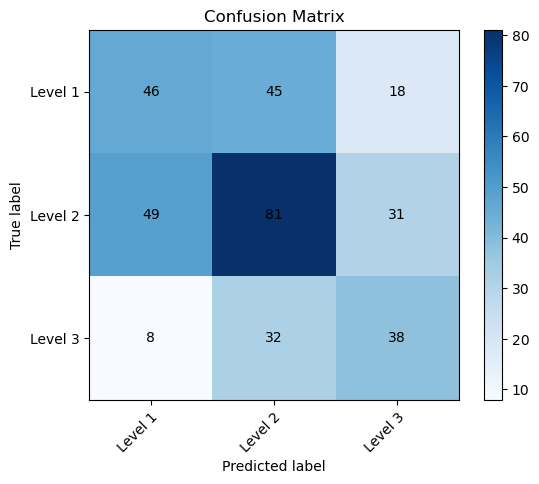

Feature Importance Rankings:
1. DESWC: 4.361038720802631
2. CNCAll: 3.7722670090936226
3. PCTEMPz: 3.3322891244224078
4. DESWLltd: 3.291970649601487
5. DESWLlt: 3.14905225750957
6. WRDPOLc: 2.969496387524963
7. WRDHYPn: 2.606504584663612
8. WRDIMGc: 2.57104273312007
9. WRDMEAc: 2.315471649117496
10. PCCONNz: 2.271821184097082
11. PCSYNz: 2.23198123831578
12. PCCNCz: 2.1474983122804914
13. WRDFRQmc: 2.096488655218196
14. PCVERBz: 2.0705902578014324
15. RDL2: 2.003119235680933
16. DESSL: 1.9360936430377247
17. WRDADJ: 1.895724007524576
18. WRDAOAc: 1.8916692895270075
19. LDVOCD: 1.7979011908590752
20. WRDHYPnv: 1.7893576395948734
21. DESWLsy: 1.7752753235183008
22. DRNEG: 1.7405791809779205
23. DRAP: 1.735347156653086
24. RDFRE: 1.7126741394344915
25. PCDCz: 1.7041213977934049
26. WRDADV: 1.6843428033439696
27. PCREFz: 1.609162469652447
28. WRDHYPv: 1.559502600763814
29. SMINTEp: 1.437512491362821
30. SMTEMP: 1.4203435425325384
31. PCSYNp: 1.4149611870322465
32. DRPP: 1.3751731713455
33.

In [13]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, club_target=True, experiment="Experiment6 RF")

#### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.93      0.33      0.49      1162
         2.0       0.08      0.50      0.13        96
         3.0       0.18      0.48      0.26       130

    accuracy                           0.36      1388
   macro avg       0.40      0.44      0.29      1388
weighted avg       0.80      0.36      0.44      1388

[[384 532 246]
 [  9  48  39]
 [ 18  49  63]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.87      0.30      0.44       303
         2.0       0.06      0.43      0.11        23
         3.0       0.08      0.32      0.13        22

    accuracy                           0.31       348
   macro avg       0.34      0.35      0.23       348
weighted avg       0.77      0.31      0.40       348

[[ 90 140  73]
 [  6  10   7]
 [  7   8   7]]


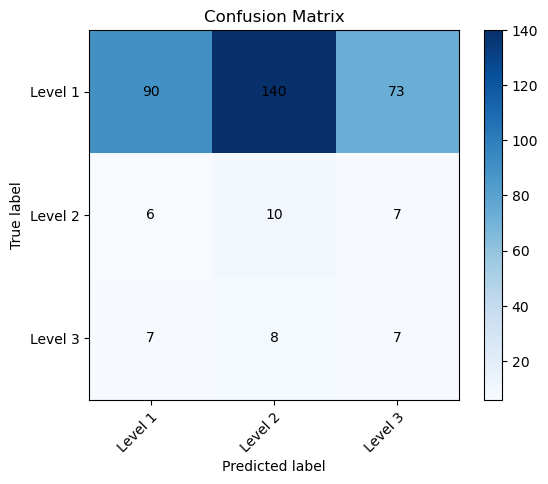

None


In [14]:
scores = Naive_Bayes_Model(data6, use_smote_technique=0, scores=scores, club_target=True, experiment="Experiment6 NB")

#### Light GBM

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 1, 'reg_lambda': 1}
Best Score:  0.5244838064566397
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.91      0.94       446
           2       0.93      0.99      0.95       590
           3       0.99      0.97      0.98       352

    accuracy                           0.96      1388
   macro avg       0.96      0.96      0.96      1388
weighted avg       0.96      0.96      0.96      1388

[[404  39   3]
 [  6 582   2]
 [  1   8 343]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.47      0.49      0.48        97
           2       0.58      0.54      0.55       170
           3       0.47      0.51      0.49        81

    accuracy                           0.52       348
   macro avg       0.50      0.51      0.51       348
weighted avg

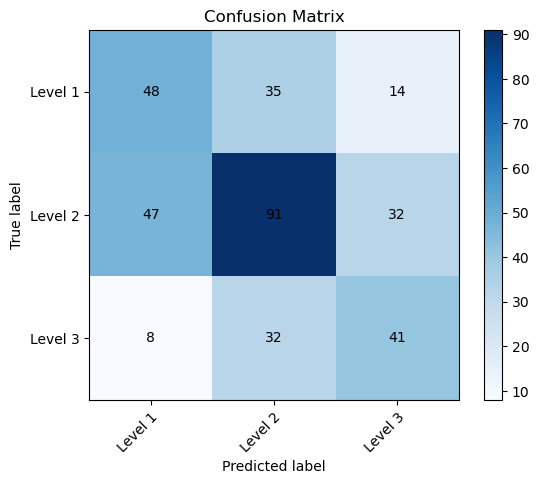

In [15]:
scores = light_GBM(data6, scores=scores, use_smote_technique=0, club_target=True,  experiment="Experiment6 LGBM")

## Experiment 7: 

Heuristics based approach on math features

In [67]:
heuristics = {
    'no_of_exps' : 3,
    'mod_count' : 2,
    'log_count' : 3,
    'fracs_count' : 2,
    'eqlts_count' : 1,
    'neqlts_count' : 2,
    'max_degree_of_equations' : 1,
    'number_of_digits' : 1,
    'number_of_numbers' : 1,
    'no_of_equations' : 2,
    'no_of_variables' : 2
}

In [68]:
data7 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


In [69]:
for col,weight in heuristics.items():
    data7[col] = data7[col] * weight

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.47701149425287354
train_evaluation:

              precision    recall  f1-score   support

           1       0.99      0.93      0.96       370
           2       0.91      0.96      0.93       331
           3       0.91      0.92      0.92       346
           4       0.91      0.95      0.93       331
           5       0.97      0.93      0.95       362

    accuracy                           0.94      1740
   macro avg       0.94      0.94      0.94      1740
weighted avg       0.94      0.94      0.94      1740

[[343  15   7   4   1]
 [  1 317   7   4   2]
 [  3   9 318  11   5]
 [  1   

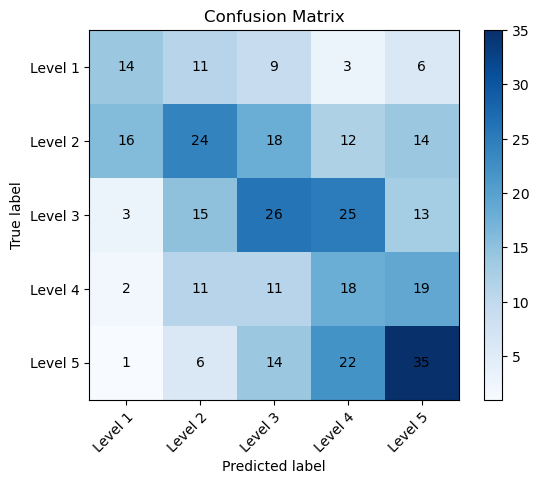

Feature Importance Rankings:
1. DESWC: 2.710855857980781
2. DESSL: 2.600769517659378
3. WRDADJ: 2.575902134755213
4. symbol_count: 2.469919654217891
5. no_of_variables: 2.3937461722662463
6. DESWLlt: 2.2538620401520935
7. DESWLltd: 2.228168433898791
8. PCTEMPz: 2.2156935807441354
9. CNCAll: 2.1762676350708476
10. max_degree_of_equations: 2.0638506942190915
11. RDL2: 1.8916782358427693
12. DESWLsyd: 1.8700334135747774
13. PCCONNz: 1.8572306787597481
14. PCREFp: 1.8358538929709094
15. RDFKGL: 1.8320805760575958
16. PCCNCz: 1.8222222562111743
17. WRDFAMc: 1.7846063544548756
18. WRDMEAc: 1.7798886659414153
19. WRDAOAc: 1.7617872793031988
20. WRDIMGc: 1.7535452416788475
21. WRDFRQmc: 1.7219078066275146
22. LDVOCD: 1.715443798406353
23. PCVERBz: 1.7105709023045808
24. WRDHYPn: 1.6998652410375976
25. WRDHYPv: 1.687225316643918
26. PCSYNp: 1.6756698730940374
27. PCSYNz: 1.6126036615656207
28. DRAP: 1.5945197482357163
29. PCREFz: 1.5519191489604196
30. WRDPRO: 1.5204260538077894
31. PCDCz: 1.50

In [70]:
scores = rf_model(data7, scores=scores, experiment="Heuristics+SMOTE")

5    435
4    396
3    391
2    336
1    178
Name: level, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5403371165883178
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.92      0.92       416
           2       0.89      0.94      0.91       590
           3       0.95      0.87      0.91       382

    accuracy                           0.91      1388
   macro avg       0.92      0.91      0.91      1388
weighted avg       0.92      0.91      0.91      1388

[[381  31   4]
 [ 21 557  12]
 [  9  41 332]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.52      0.54       112
           2       0.53      0.53      0.53       158
           3       0.43      0.47      0.45        78

    accuracy                  

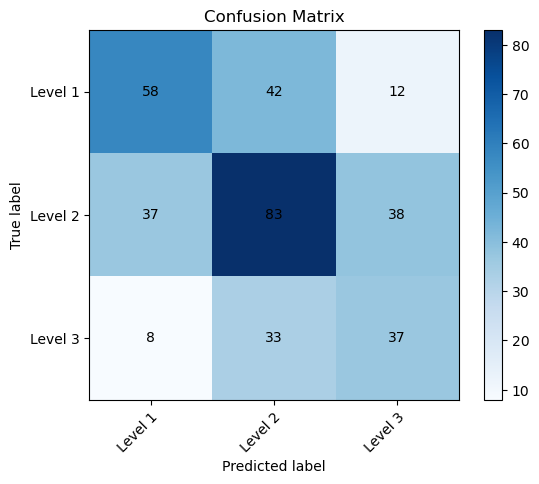

Feature Importance Rankings:
1. DESWC: 3.636147164679878
2. DESWLltd: 3.1578916727089243
3. DESWLlt: 2.6574590369466837
4. DESSL: 2.6236761370102
5. PCCNCz: 2.45339987271848
6. RDL2: 2.4247453599742057
7. WRDIMGc: 2.4190419836522636
8. WRDPOLc: 2.3335471445726967
9. WRDMEAc: 2.2570887545544944
10. PCTEMPz: 2.1623039296346884
11. PCCONNz: 1.9600825313303691
12. PCSYNz: 1.9088666324560992
13. PCSYNp: 1.9085058467034102
14. PCREFz: 1.9071632779733365
15. WRDFRQmc: 1.8967243523723536
16. symbol_count: 1.8256676744515872
17. RDFKGL: 1.8067332407939019
18. WRDADV: 1.761434118571897
19. WRDHYPnv: 1.6887488454615276
20. no_of_variables: 1.642606574981785
21. DESWLsyd: 1.6407197550409078
22. DESWLsy: 1.61998168968047
23. WRDADJ: 1.580771714112946
24. DRPP: 1.5774097327622927
25. PCVERBz: 1.5510587698048
26. CNCAll: 1.5068899958443456
27. WRDAOAc: 1.4436232725930187
28. no_of_equations: 1.3995819371900193
29. DRNEG: 1.3531297698370726
30. WRDHYPn: 1.352313019098918
31. PCNARz: 1.3499730026830505

In [71]:
scores = rf_model(data7, use_smote_technique=0, scores=scores, experiment="Heuristics", club_target=True)

In [72]:
data7 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_3_TARGET_FEATURE)
for col,weight in heuristics.items():
    data7[col] = data7[col] * weight

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Class distribution before SMOTE: Counter({2: 918, 1: 292, 3: 178})
Class distribution after SMOTE: Counter({1: 918, 2: 918, 3: 918})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.7712463289886158
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.94      0.95       933
           2       0.93      0.94      0.93       910
           3       0.96      0.96      0.96       911

    accuracy                           0.95      2754
   macro avg       0.95      0.95      0.95      2754
weighted avg       0.95      0.95      0.95      2754

[[880  40  13]
 [ 32 852  26]
 [  6  26 879]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.41      0.48      0.44        63
           2       0.71      0.68      0.70       240
      

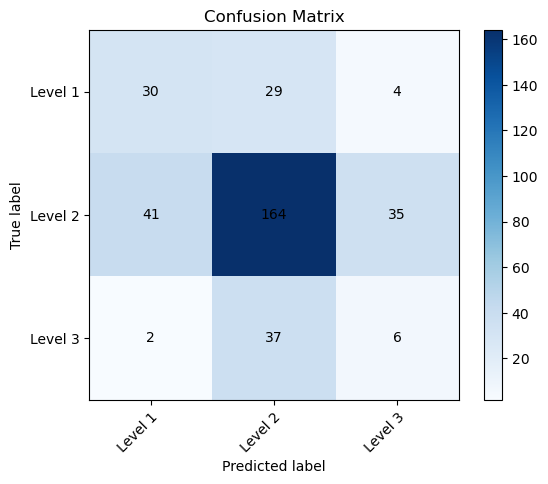

Feature Importance Rankings:
1. DESWC: 3.0871161693646716
2. DESSL: 2.5249364974791098
3. WRDFRQmc: 2.498783752017639
4. DESWLlt: 2.4724282583442294
5. DRINF: 2.3765778281231733
6. WRDAOAc: 2.3701597955776106
7. SMTEMP: 2.28423570689022
8. SYNLE: 2.0427826399590003
9. PCVERBz: 1.9486367437512278
10. CNCAll: 1.8756079705241708
11. no_of_pow: 1.8657342195248432
12. PCSYNz: 1.840237045655426
13. WRDHYPv: 1.6904003213823449
14. DESWLltd: 1.6209293031749272
15. PCTEMPz: 1.5991488682153165
16. RDFKGL: 1.5828498221573168
17. WRDPRP1s: 1.5610160206657586
18. PCCNCz: 1.5567761148337889
19. has_pow: 1.528323851317905
20. PCCNCp: 1.4950817330974162
21. WRDHYPnv: 1.4490430868893005
22. PCNARp: 1.427934660901235
23. WRDPRO: 1.413639958213741
24. WRDHYPn: 1.3889685003044825
25. RDFRE: 1.3853691269594128
26. SMCAUSwn: 1.3687003756370446
27. LDVOCD: 1.329982756225927
28. PCREFz: 1.3243101357185687
29. no_of_variables: 1.2950699856408205
30. WRDADJ: 1.2768776622357516
31. WRDCNCc: 1.234169047875268
32.

In [73]:
scores = rf_model(data7, target_feature=GPT_3_TARGET_FEATURE[0], scores=scores, experiment="Heuristics+GPT+SMOTE")

2    1148
1     365
3     223
Name: gpt_val, dtype: int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.6390463080798898
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.83      0.86       314
           2       0.93      0.96      0.94       891
           3       0.93      0.91      0.92       183

    accuracy                           0.92      1388
   macro avg       0.92      0.90      0.91      1388
weighted avg       0.92      0.92      0.92      1388

[[262  50   2]
 [ 30 851  10]
 [  0  17 166]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.23      0.35      0.28        48
           2       0.83      0.67      0.74       283
           3       0.09      0.24      0.13        17

    accuracy                           0.61

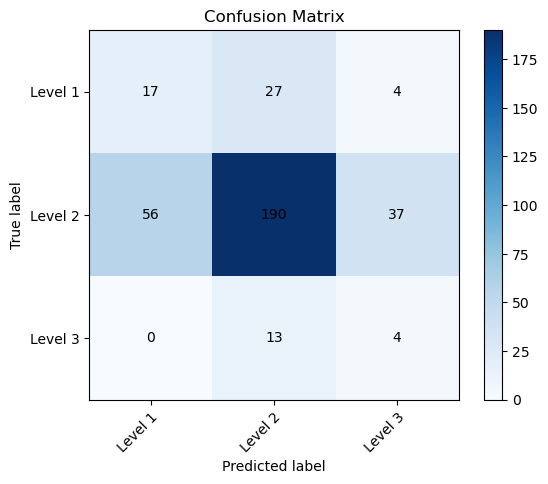

Feature Importance Rankings:
1. DESWC: 2.79308653877901
2. WRDFRQmc: 2.717346128220506
3. WRDHYPv: 2.6944278654813822
4. CNCAll: 2.693421892707322
5. DESWLlt: 2.2776961555862596
6. DESWLltd: 2.1823382607274286
7. PCVERBz: 2.143981975445149
8. PCCNCz: 2.003933519645253
9. RDL2: 1.9743990702098095
10. PCSYNp: 1.9432297403336911
11. PCDCz: 1.9014487784136538
12. PCSYNz: 1.892072672111226
13. SMTEMP: 1.892018939657684
14. LDVOCD: 1.8893717805711123
15. no_of_pow: 1.8500844062281228
16. WRDAOAc: 1.8380334507047058
17. DESWLsyd: 1.7235901068520532
18. PCNARz: 1.643979802736778
19. WRDPOLc: 1.631383230647773
20. PCTEMPz: 1.6300950529609053
21. DESSL: 1.5767210636161748
22. WRDHYPn: 1.556008591231696
23. DRAP: 1.5402090468145402
24. PCCONNp: 1.4994374501848167
25. WRDMEAc: 1.4929201161371732
26. WRDADV: 1.4337349105466481
27. WRDADJ: 1.4267518952847749
28. DRPP: 1.401699885699364
29. PCREFz: 1.3814703267196127
30. DESWLsy: 1.3791765275488845
31. RDFKGL: 1.3768454564171282
32. PCCNCp: 1.3618394

In [74]:
scores = rf_model(data7, target_feature=GPT_3_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Heuristics+GPT")

In [75]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.773273,0.510195
1,Experiment1,0.766265,0.521333
2,Experiment1+GPT+SMOTE,0.787788,0.534052
3,Experiment1+GPT,0.784788,0.575071
4,Experiment2+SMOTE,0.783197,0.531553
5,Experiment2,0.669638,0.498305
6,Experiment2+GPT+SMOTE,0.821301,0.519940
7,Experiment2+GPT,0.799827,0.560150
8,Experiment3+SMOTE,0.853216,0.544629
9,Experiment3,0.825629,0.572243


In [76]:
scores.to_csv("../Results/GT_GPT_3Levels_Comparision_Algebra.csv", index=False)